# Indonesia Youtube Trending Analysis 8th Jul - 14th Jul 2020

### Table of Contents
- [Introduction](#Introduction)
    - [Importing Libraries](#Importing-Libraries)
    - [Reading From Data Files and Preprocessing](#Reading-Data-File-and-Preprocessing)
    - [Scrape Social Blade Info](#Scrape-Social-Blade-Info)
    - [Further Preprocessing and Feature Engineering](#Further-Preprocessing-and-Feature-Engineering)
- [Analysis](#Analysis)
    - [Analysis Table of Contents](#Analysis-Table-of-Contents)
    - [1. Daily Data EDA](#1.-Daily-Data-EDA)
        - [1.1 Which channels dominate the trending videos on a daily basis?](#1.1-Which-channels-dominate-the-trending-videos-on-a-daily-basis?)
    - [2. Weekly Data EDA](#2.-Weekly-Data-EDA)
        - [2a. Video Data Analysis](#2a.-Video-Data-Analysis)
            - [2.1 Which are the most popular video categories across the week?](#2.1-Which-are-the-most-popular-video-categories-across-the-week?)
            - [2.2 How long do trending videos stay trending?](#2.2-How-long-do-trending-videos-stay-trending?)
            - [2.3 How long does it take for videos to become trending after being published?](#2.3-How-long-does-it-take-for-videos-to-become-trending-after-being-published?)
            - [2.4 What is the most common time to publish trending videos?](#2.4-What-is-the-most-common-time-to-publish-trending-videos?)
            - [2.5 What is the most viewed/liked/disliked/commented videos among all trending videos?](#2.5-What-is-the-most-viewed/liked/disliked/commented-videos-among-all-trending-videos?)
            - [2.6 How does the Like/Dislike ratio compare for videos?](#2.6-How-does-the-Like/Dislike-ratio-compare-for-videos?)
            - [2.6 What is the correlation of view_count, likes, dislikes, comment_count, and curr_subscribers?](#2.6-What-is-the-correlation-of-view_count,-likes,-dislikes,-comment_count,-and-curr_subscribers?)
        - [2b. Channel Data Analysis](#2b.-Channel-Data-Analysis)
            - [2.7 What is the distribution of subsribers for channels with trending videos?](#2.7-What-is-the-distribution-of-subsribers-for-channels-with-trending-videos?)
            - [2.8 What is the distribution of socialblade rank with trending videos?](#2.8-What-is-the-distribution-of-socialblade-rank-with-trending-videos?)
            - [2.9 Which country does the trending video channels originate?](#2.9-Which-country-does-the-trending-video-channels-originate?)
    - [3. Effect of trending on channel video views](#3.-Effect-of-trending-on-channel-video-views)
        - [3.1 What is the effect of being on the trending list on channel video views?](#3.1-What-is-the-effect-of-being-on-the-trending-list-on-channel-video-views?)
    - [4. Text Data Analysis on Weekly Data](#4.-Text-Data-Analysis-on-Weekly-Data)
        - [4.1 What is the distribution of the title lengths for trending videos?](#4.1-What-is-the-distribution-of-the-title-lengths-for-trending-videos?)
        - [4.2 Word Cloud on most common words on Title/Descriptions/Tags](#4.2-Word-Cloud-on-most-common-words-on-Title/Descriptions/Tags)
            - [4.2.1 Most common word on Title](#4.2.1-Most-common-word-on-Title)
            - [4.2.2 Most common word on Description](#4.2.2-Most-common-word-on-Description)
            - [4.2.3 Most common word on Tags](#4.2.3-Most-common-word-on-Tags)
    - [5. Topic Modelling](#5.-Topic-Modelling)
         - [5.1 LDA Model](#5.1-LDA-Model)
         - [5.2 STTM](#5.2-STTM)
    - [6. Thumbnail Analysis](#6.-Thumbnail-Analysis)
- [Conclusion](#Conclusion)

#### Introduction
Youtube is an online video-sharing platform that allows users to upload, view, rate, share, add to playlists, report, comment on videos, and subscribe to other users. In Indonesia, Youtube has been named as the most active social media platform by "Hootsuite and We Are Social" Digital 2019 report. Moreover, the top 10 Youtube channels in Indonesia has amassed more than 100M subscribers with more than 10B video views. But! that is only for the top 5 Youtube Channels. Currently, there are milions of Youtube content creators out there. <br/>

At any point in time Youtube published a list of 200 trending videos which showcases what’s happening on YouTube. Trending videos aims to surface videos that a wide range of viewers would find interesting which can be attributed to many factors ranging from view_counts, novelty, and temperature of the video. Trending list are updated every 15 minutes where videos may move up and down the ranks or removed.

<table><tr>
<td> <img src="external_images/top_sosmed.JPG" width="300" height = "200", style="margin-right:50px"/> </td>
<td> <img src="external_images/top_youtube_channels.JPG" width="500" height = "500"/> </td>
</tr></table>
<img src="external_images/top_trending.JPG" width="900" height = "600"/> </td>

**Source:** <br/>
https://greenhouse.co/blog/indonesias-social-media-landscape-an-overview/ <br/>
https://gb.youtubers.me/indonesia/all/top-most-subscribed-youtube-channels-in-indonesia <br/>
https://www.youtube.com/channel/UCh1krs5h6SJ5lPeaYubWO9Q <br/>

##### Importing Libraries

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import urllib.request
import ast
import datetime
import time
import math
from joblib import Parallel, delayed

# import image and text processing libraries
import nltk
from nltk.corpus import stopwords
import stylecloud
from PIL import Image
import cv2

# ignore all wanrings
import warnings
warnings.filterwarnings("ignore")

# pandas options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# category names mapping from Youtube API
category_mapping = {1: 'Film & Animation',
                    2: 'Autos & Vehicles',
                    10: 'Music',
                    15: 'Pets & Animals',
                    17: 'Sports',
                    18: 'Short Movies',
                    19: 'Travel & Events',
                    20: 'Gaming',
                    21: 'Videoblogging',
                    22: 'People & Blogs',
                    23: 'Comedy',
                    24: 'Entertainment',
                    25: 'News & Politics',
                    26: 'Howto & Style',
                    27: 'Education',
                    28: 'Science & Technology',
                    29: 'Nonprofits & Activism',
                    30: 'Movies',
                    31: 'Anime/Animation',
                    32: 'Action/Adventure',
                    33: 'Classics',
                    34: 'Comedy',
                    35: 'Documentary',
                    36: 'Drama',
                    37: 'Family',
                    38: 'Foreign',
                    39: 'Horror',
                    40: 'Sci-Fi/Fantasy',
                    41: 'Thriller',
                    42: 'Shorts',
                    43: 'Shows',
                    44: 'Trailers'
                   }

#### Reading Data File and Preprocessing

**Where does the data come from?** <br/>
Youtube Data API v3 (https://developers.google.com/youtube/v3). Code utilized to extract data from the API comes from https://github.com/mitchelljy/Trending-YouTube-Scraper. The data is extracted for 5 days starting from 8th July 2020 at 8pm WIB everyday.

In [3]:
df = pd.DataFrame()
for file in os.listdir('data'):
    temp = pd.read_csv('data/' + file)
    temp['rank'] = range(1,201)
    df = df.append(temp, ignore_index = True)

df['categoryIdName'] = df['categoryId'].apply(lambda x: category_mapping[x])  # category mapping
df['trending_date'] = pd.to_datetime(df['trending_date'], utc = True, format = '%y.%d.%m') \
                      + datetime.timedelta(hours=20) # extract trending time
df['publishedAt'] = pd.to_datetime(df['publishedAt']) + datetime.timedelta(hours = 7)  #convert UTC to WIB
print('Dataframe Shape: ', df.shape)  # 200 videos each day

Dataframe Shape:  (1400, 18)


In [4]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,rank,categoryIdName
0,XFTu8vyC-PY,AURELIE HERMANSYAH - KEPASTIAN (Official Music...,2020-07-03 08:30:11+00:00,UCHpZSZi1rkM7NiayhxXw-cw,MyMusic Records,10,2020-07-08 20:00:00+00:00,MyMusic|My Music|Music Video|Official Clip|MyM...,10087738,696952,28604,471713,https://i.ytimg.com/vi/XFTu8vyC-PY/default.jpg,False,False,Cara Unduh Nada Sambung PribadiAurelie Hermans...,1,Music
1,Ujb-gvqsoi0,Red Velvet - IRENE & SEULGI 'Monster' MV,2020-07-07 10:00:05+00:00,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2020-07-08 20:00:00+00:00,아이린|슬기|아이린&슬기|monster|몬스터|monster mv|레드벨벳|레드벨벳...,14465217,1912382,34266,175179,https://i.ytimg.com/vi/Ujb-gvqsoi0/default.jpg,False,False,Red Velvet - IRENE & SEULGI's 1st Mini Album M...,2,Music
2,NZ2_mOTc4TM,Milan 4-2 Juventus | Ronaldo Goal Not Enough a...,2020-07-08 05:35:53+00:00,UCBJeMCIeLQos7wacox4hmLQ,Serie A,17,2020-07-08 20:00:00+00:00,AC Milan|calcio|Rebic|Milan Juventus|Juventus|...,9695590,186749,6705,10502,https://i.ytimg.com/vi/NZ2_mOTc4TM/default.jpg,False,False,Juventus missed the chance to move 10 points c...,3,Sports
3,32si5cfrCNc,BLACKPINK - 'How You Like That' DANCE PERFORMA...,2020-07-06 07:00:00+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2020-07-08 20:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,34979014,3260509,52657,155862,https://i.ytimg.com/vi/32si5cfrCNc/default.jpg,False,False,▶️ MORE INFO ABOUT DANCE COVER CONTEST : https...,4,Music
4,-ogKtrQs3c0,jurnalrisa 90 - MENGENALKAN MAMAT DAN UJANG KE...,2020-07-07 21:00:00+00:00,UCKFC1LYWw1fbe9LNfm2vEPg,jurnalrisa,22,2020-07-08 20:00:00+00:00,[none],1648795,167782,948,15598,https://i.ytimg.com/vi/-ogKtrQs3c0/default.jpg,False,False,Selamat datang di #jurnalrisaSaya dan tim berk...,5,People & Blogs


#### Scrape Social Blade Info

In order to obtain information regarding channel history, view counts, channel origin, etc, we decided to webscrape https://socialblade.com/ website. Below is a snapshot of the website.

<img src="external_images/social_blade_profile.JPG" width="900" height = "600"/> </td>

In [5]:
uniq_channelid = np.unique(df['channelId'])
base_url = 'https://socialblade.com/youtube/channel/'
headers = {'User-Agent': 
           'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
all_results = {}

In [6]:
def scrape_info(channelid):
    results = {}
    private = False
    try:
        req = urllib.request.Request(url = base_url + channelid, headers = headers) 
        html = urllib.request.urlopen(req).read()
    except:  #Users set to private!!!
        private = True
    print(channelid)

    if private == False:   
        try:
            soup = BeautifulSoup(html, 'html.parser')
            
            avatar_url = soup.find(id='YouTubeUserTopInfoAvatar').get('src')
            background_url = soup.find(id='YouTubeUserTopHeaderBackground').get('style')
            background_url = re.search(r'url\(\'(.+)\'\)', background_url).group(1)
            results['avatar_url'] = avatar_url
            results['background_url'] = background_url
            
            rank = soup.find(id='socialblade-user-content').find_all('div')[2]
            rank = re.search(r'\>\s+(.+)\s+\<', str(rank)).group(1)
            results['rank_y'] = rank

            top_bar = soup.find(id='YouTubeUserTopInfoBlock').find_all('div')        
            num_videos = int(top_bar[2].find_all('span')[1].text.replace(',','')) 
            curr_subs = top_bar[3].find_all('span')[1].text
            total_views = int(top_bar[4].find_all('span')[1].text.replace(',',''))
            country = top_bar[5].find_all('span')[1].text
            channel_type = top_bar[6].find_all('span')[2].text  # because there is the question mark bubble
            created = top_bar[7].find_all('span')[1].text

            results['num_videos'] = num_videos
            results['curr_subs'] = curr_subs
            results['total_views'] = total_views
            results['country'] = country
            results['channel_type'] = channel_type
            results['created'] = created

            past_view_gains = {}

            for i in range(14):
                view_date = soup.find(id='socialblade-user-content').find_all('div')[53 + i*10].text.strip()
                temp = soup.find(id='socialblade-user-content').find_all('div')[59 + i*10].text[1:]
                past_view_gains[view_date] = int(temp.replace('-','0').replace(',',''))
            results['past_view_gains'] = past_view_gains


            # scrape interactive charts Highcharts from social blade
            chart_data = []
            all_scripts = soup.find_all("script")
            for script in all_scripts:
                if 'Highcharts.chart' in script.text:
                    # found data match            
                    script_data = re.findall(r'series:\s+\[{\s.+\s+.+\s.+', script.text)
                    # len of script_data = 4
                    # 1. Monthly subs gain
                    # 2. Montly views
                    # 3. Weekly subs gain
                    # 4. Weekly view 
                    for ind, data in enumerate(script_data):
                        try:
                            temp = re.search(r'data:\s+(\[\[.+\]\])', data).group(1)
                            temp = np.array(ast.literal_eval(temp))
                            date_end = [datetime.datetime.fromtimestamp(int(str(elem)[:-3])).strftime('%Y-%m-%d') for elem in temp[:,0]]
                            res = {}
                            for idx, e in enumerate(date_end):
                                res[e] = temp[:,1][idx]
                            chart_data.append(res)
                        except:
                            chart_data.append({})
            results['charts'] = chart_data
        except:
            private = True
            results = {}
    else:
        results = {}
    
    # store results in all_results
    all_results[channelid] = results
    
    time.sleep(3)

In [7]:
# scrape social blade in parallel (might take a while to scrape)
#Parallel(n_jobs=-1, require='sharedmem')(delayed(scrape_info)(i) for i in uniq_channelid);
for i in uniq_channelid:
    scrape_info(i)

UC-3zv-XrPz28_W9oRd9q1tQ
UC03RvJoIhm_fMwlUpm9ZvFw
UC0k3T5AJYvKnuc52bB7rJTA
UC0zTYTRQe77tnOIS03HaNeg
UC15VpzK4og3NLmCVZQOroFw
UC1FIzF2QOcmFlSzPkT4Ln7A
UC1US-uenbxK9RbPgW8G3AsA
UC1nqMqjwWkcN80yfHM6Hcow
UC1t5dUA0eQjmw43ZH7iMe3Q
UC24_Z2L-8Ki183AI9zJJzNQ
UC2sVRtimSUdDN2myZ6Cf03w
UC2wZJuuD_WA9ps2FORco1EQ
UC34xi8JB1AKSotPUKHywbaA
UC35HKvKYPkri4Grd5KXl3wQ
UC3IZKseVpdzPSBaWxBxundA
UC3Pa0DVzVkqEN_CwsNMapqg
UC3TWomTUdYuMjkWI4PkQXeg
UC3nsS1zgb4Jye9kmA45K6Yg
UC3yYwEhRUFk7d01uZA6Dtxw
UC4LADtN8xwppFydHUB1s5uA
UC4QHuyL9vp6htgj8cSrcbyA
UC4yu5KnMvVX_seRuGzKQBZg
UC56gTxNs4f9xZ7Pa2i5xNzg
UC57XAjJ04TY8gNxOWf-Sy0Q
UC5A_pdnOOcMsaBzFAHiTMLg
UC5BMIWZe9isJXLZZWPWvBlg
UC5BMQOsAB8hKUyHu9KI6yig
UC5IA7MpYcbhbA28RgyQrV0A
UC5PBnSG7C0WXp5gjd4bzKtw
UC5UQ5GlSSpZDpZiVij5bWUw
UC6_kmAF-67rCiIpa3dCit5A
UC6yW44UGJJBvYTlfC7CRg2Q
UC70oKkuTAoL-_grDe4l2pAw
UC789h3eqw0H1HqGmIsI26OA
UC7B2kbI32oz3RSB5CsbPgkQ
UC7GWXKxiy9_AU9TytEh00eg
UC7Jx-Jv2r-22NcGLtJKMcSQ
UC7Yjwmy-kWQl2b5RN5Qx3pQ
UC7Zgj5p9QOuz65oDU51Jlng
UC7am34-1rGU_ky1vWYnoOJQ


In [8]:
# prprocess social blade info
sbdf = pd.DataFrame()
sbdf['channelid'] = all_results.keys()

def get_data(x, attr):
    if len(x.keys()) == 0:
        return ''
    else:
        return x[attr]

def get_chart_data(x, i):
    if len(x.keys()) == 0:
        return np.nan
    
    if len(x['charts']) == 2:
        if i == 0 or i == 1:
            return np.nan
        elif i == 3:
            return x['charts'][0]
        else:
            return x['charts'][1]
    elif len(x['charts']) == 4:
        return x['charts'][i]
    else:
        return np.nan
        

sbdf['rank_y'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x],'rank_y'))
sbdf['num_videos'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x],'num_videos'))
sbdf['curr_subs'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x],'curr_subs'))
sbdf['total_views'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x],'total_views'))
sbdf['country'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x],'country'))
sbdf['channel_type'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x],'channel_type'))
sbdf['past_view_gains'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x], 'past_view_gains'))
sbdf['monthly_subs_gain'] = sbdf['channelid'].apply(lambda x: get_chart_data(all_results[x], 0))
sbdf['monthly_views'] = sbdf['channelid'].apply(lambda x: get_chart_data(all_results[x], 1))
sbdf['weekly_subs_gain'] = sbdf['channelid'].apply(lambda x: get_chart_data(all_results[x], 2))
sbdf['weekly_view'] = sbdf['channelid'].apply(lambda x: get_chart_data(all_results[x], 3))
sbdf['avatar_url'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x],'avatar_url'))
sbdf['background_url'] = sbdf['channelid'].apply(lambda x: get_data(all_results[x],'background_url'))

def map_channel_categories(x):
    if x == 'Autos':
        return 'Autos & Vehicles'
    elif x == 'Film':
        return 'Film & Animation'
    elif x == 'Games':
        return 'Gaming'
    elif x == 'Howto':
        return 'Howto & Style'
    elif x == 'News':
        return 'News & Politics'
    elif x == 'Nonprofit':
        return 'Nonprofit & Activism'
    elif x == 'People':
        return 'People & Blogs'
    elif x == 'Travel':
        return 'Travel & Events'
    elif x == 'Comedy' or x == 'Education' or x == 'Entertainment' or x == 'Music' or x == 'Sports':
        return x
    else:
        return ''
    
sbdf['channel_type'] = sbdf['channel_type'].apply(lambda x: map_channel_categories(x))

In [9]:
# social blade information
sbdf.head()

,channelid,rank_y,num_videos,curr_subs,total_views,country,channel_type,past_view_gains,monthly_subs_gain,monthly_views,weekly_subs_gain,weekly_view,avatar_url,background_url
0,UC-3zv-XrPz28_W9oRd9q1tQ,B+,511,853K,167468011,,Entertainment,"{'2020-07-02': 362618, '2020-07-03': 347410, '...","{'2020-06-30': 50000, '2020-05-31': 45000, '20...","{'2020-06-30': 9825643, '2020-05-31': 8323658,...","{'2019-07-01': 5831, '2019-07-08': 8634, '2019...","{'2019-07-01': 742260, '2019-07-08': 1472604, ...",https://yt3.ggpht.com/a/AATXAJxUBJ973_msYWckXL...,https://yt3.ggpht.com/-iX6V0-rkjBlbP0TS4D4XU2Q...
1,UC03RvJoIhm_fMwlUpm9ZvFw,A-,278,12.7M,3060346549,US,Howto & Style,"{'2020-07-02': 2461367, '2020-07-03': 2657719,...","{'2020-06-30': 200000, '2020-05-31': 400000, '...","{'2020-06-30': 78397361, '2020-05-31': 8970080...","{'2019-07-01': 171917, '2019-07-08': 274794, '...","{'2019-07-01': 46773678, '2019-07-08': 6161215...",https://yt3.ggpht.com/a/AATXAJwpVGnwnrTYZRwh2w...,https://yt3.ggpht.com/lafdBwEuRBK1B_j34VGBQW8Z...
2,UC0k3T5AJYvKnuc52bB7rJTA,A-,26,2.13M,426637941,ID,Music,"{'2020-07-02': 2270237, '2020-07-03': 2259896,...","{'2020-06-30': 260000, '2020-05-31': 90000, '2...","{'2020-06-30': 37415651, '2020-05-31': 2200491...","{'2019-07-01': 8137, '2019-07-08': 7535, '2019...","{'2019-07-01': 2248478, '2019-07-08': 2131944,...",https://yt3.ggpht.com/a/AATXAJxUXeS9HEnUjyYNZG...,https://yt3.ggpht.com/o9apiVLK3twfIyeSec67-qbX...
3,UC0zTYTRQe77tnOIS03HaNeg,B,78,119K,5861468,ID,,"{'2020-07-02': 132336, '2020-07-03': 307421, '...","{'2020-06-30': 42400, '2020-05-31': 29373}","{'2020-06-30': 2299515, '2020-05-31': 1266503}","{'2020-05-04': 790, '2020-05-12': 1470, '2020-...","{'2020-05-04': 29014, '2020-05-12': 55154, '20...",https://yt3.ggpht.com/a/AATXAJx0ml9W_WZ4ur5Qc7...,https://yt3.ggpht.com/yK4U0vu9vPKJMpDVh-b6bbOE...
4,UC15VpzK4og3NLmCVZQOroFw,B+,483,1.22M,201397910,ID,Comedy,"{'2020-07-02': 289587, '2020-07-03': 632122, '...","{'2020-06-30': 80000, '2020-05-31': 50000, '20...","{'2020-06-30': 15030071, '2020-05-31': 1545024...","{'2019-07-01': 7184, '2019-07-08': 5700, '2019...","{'2019-07-01': 1837098, '2019-07-08': 1490133,...",https://yt3.ggpht.com/a/AATXAJxT2bDtOEP9fV4szr...,https://yt3.ggpht.com/5NuXcP39rm0xlo7z9RHRMZke...


In [10]:
# merge both dataframe
df = pd.merge(df, sbdf, left_on = 'channelId', right_on = 'channelid', how = 'left')

# FILL MISSING CHANNEL GENRE WITH VIDEO TYPE
def fill_missing_channel_type(x):
    if x['channel_type'] != '':
        return x['channel_type']
    else:
        return x['categoryIdName']
    
df['channel_type'] = df.apply(lambda x: fill_missing_channel_type(x), axis = 1)

In [11]:
# save results to local pkl file to avoid rescraping and being blocked by socialblade
df.to_pickle('temp.pkl')

#### Further Preprocessing and Feature Engineering

In [12]:
df = pd.read_pickle('temp.pkl')

In [13]:
# adding time to trending column
df['time_to_trend'] = df['trending_date'] - df['publishedAt']

# convert time_to_tend to hours
def days_hours_minutes(td):
    days = td.days
    hours = td.seconds //3600
    minutes = (td.seconds//60)%60
    return days * 24 + hours + minutes / 60

df['time_to_trend'] = df['time_to_trend'].apply(lambda x: days_hours_minutes(x))

In [14]:
# get publishing hour category (based on hours:00/30)
def get_publish_hour(x):
    hour = x.hour
    minute = x.minute
    if hour == 24:
        return '00:00'
    if minute >= 45:
        return str(str((hour + 1)) + ':00')
    elif minute >= 15 and minute < 45:
        return str(str(hour) + ':30')
    else:
        return str(str(hour) + ':00')

df['publish_cat'] = df['publishedAt'].apply(lambda x: get_publish_hour(x))

In [15]:
def convert_curr_subs(x):
    curr_subs = x['curr_subs']
    if curr_subs == '':
        return int(-1)
    last_str = curr_subs[-1]
    number = curr_subs[:-1]
    point_pos = -1
    if '.' in number:
        point_pos = 3 - number.index('.')
    
    if last_str == 'K':
        last_str = 1000
    elif last_str == 'M':
        last_str = 1000000
    
    if point_pos != -1:
        final_num = int(number.replace('.','')) / (10 ** point_pos) * last_str
    else:
        final_num = int(number.replace('.','')) * last_str
    return int(final_num)

def curr_subs_cat(x):
    if x == -1:
        return 'N/A'
    if x <= 500000:
        return '<500k'
    elif x <= 1000000:
        return '500k-1M'
    elif x <= 5000000:
        return '1M-5M'
    elif x <= 10000000:
        return '5M-10M'
    else:
        return '>10M'

df['curr_subs_num'] = df.apply(lambda x: convert_curr_subs(x), axis = 1)
df['curr_subs_cat'] = df['curr_subs_num'].apply(lambda x: curr_subs_cat(x))

In [16]:
def clean_title(x, ret_type):
    no_punc = re.sub(r'[^\w\s]','', x)  #strips all punctuation and emojis
    no_punc = re.sub(r'\s+', ' ', no_punc)  #remove multiple spaces
    if ret_type == 'len':
        return len(no_punc.split(' '))
    
    foreign = []
    # korean words
    korean = re.findall(r'[\uAC00-\uD7AF]+', no_punc)
    # jpcn words
    jpcn = re.findall(r'[\u3000-\u303f\u3040-\u309f\u30a0-\u30ff\uff00-\uff9f\u4e00-\u9faf\u3400-\u4dbf]+', no_punc) 
    foreign.extend(korean)
    if len(jpcn) >= 1:
        for ind, elem in enumerate(jpcn):
            lenelem = len(elem)
            for i in range(lenelem):
                foreign.append(jpcn[ind][i])   # append character by character for jp and cn
    
    # remove all foreign chars
    no_punc = re.sub(r'[\uAC00-\uD7AF]+', '', no_punc)
    no_punc = re.sub(r'[\u3000-\u303f\u3040-\u309f\u30a0-\u30ff\uff00-\uff9f\u4e00-\u9faf\u3400-\u4dbf]+', '',no_punc)
    no_punc = re.sub(r'[^a-zA-Z\s0-9\u00C0-\u00FF]+','', no_punc)  #remove any remaining foreign chars
    no_punc = re.sub(r'\s+', ' ', no_punc)  #remove multiple spaces
    no_punc = no_punc.split(' ')  #splits by space
    
    # No stopwords removal on title
    no_punc = [i.lower() for i in no_punc]
    no_punc = [word for word in no_punc if word not in stopwords.words('english')] #removes stopwords
    no_punc = [word for word in no_punc if word not in stopwords.words('indonesian')] #removes stopwords

    no_punc = [elem for elem in no_punc if len(elem) > 1] #remove single characters
    return no_punc

df['title_len'] = df['title'].apply(lambda x: clean_title(x, 'len'))
df['title_cleaned'] = df['title'].apply(lambda x: clean_title(x, 'clean'))

In [17]:
def clean_desc(x):
    if pd.isnull(x) == True:
        return []
    
    no_punc = re.sub(r'https\S+', '', x) # remove all url
    no_punc = re.sub(r'http\S+', '', no_punc) # remove all url
    no_punc = re.sub(r'\S*@\S*\s?','', no_punc) # remove all emails
    no_punc = re.sub(r'[^\w\s]','', no_punc)  #strips all punctuation and emojis
    no_punc = re.sub(r'\s+', ' ', no_punc)  #remove multiple spaces
    no_punc = re.sub(r'_*', '', no_punc) # repalce ____
    no_punc = re.sub(r'[^a-zA-Z\s0-9\u00C0-\u00FF]', '', no_punc)  #remove indian, russian, etc others
    
    foreign = []
    # korean words
    korean = re.findall(r'[\uAC00-\uD7AF]+', no_punc) 
    # jpcn words
    jpcn = re.findall(r'[\u3000-\u303f\u3040-\u309f\u30a0-\u30ff\uff00-\uff9f\u4e00-\u9faf\u3400-\u4dbf]+', no_punc)
    foreign.extend(korean)
    if len(jpcn) >= 1:
        for ind, elem in enumerate(jpcn):
            lenelem = len(elem)
            for i in range(lenelem):
                foreign.append(jpcn[ind][i])   # append character by character for jp and cn
    
    
    # remove all foreign chars
    no_punc = re.sub(r'[\uAC00-\uD7AF]+', '', no_punc)
    no_punc = re.sub(r'[\u3000-\u303f\u3040-\u309f\u30a0-\u30ff\uff00-\uff9f\u4e00-\u9faf\u3400-\u4dbf]+', '', no_punc)
    no_punc = re.sub(r'[^a-zA-Z\s0-9\u00C0-\u00FF]+','', no_punc)  #remove any remaining foreign chars
    no_punc = re.sub(r'\s+', ' ', no_punc)  #remove multiple spaces
    no_punc = no_punc.split(' ')  #splits by space
    no_punc = [i.lower() for i in no_punc]
    # stopwords removal
    no_punc = [word for word in no_punc if word not in stopwords.words('english')] 
    no_punc = [word for word in no_punc if word not in stopwords.words('indonesian')]
    
    no_punc = [elem for elem in no_punc if len(elem) > 1] # remove one character words

    return no_punc

df['desc_cleaned'] =  df['description'].apply(lambda x: clean_desc(x))

In [18]:
# no duplicates and keeps only the first occurance of trending (for publish date, etc)
no_dups_f = df.sort_values('trending_date', ascending = True)
no_dups_f = no_dups_f.drop_duplicates(subset='video_id', keep='first')

# no duplicates and keeps last occurance for views, comments, etc
no_dups_l = df.sort_values('trending_date', ascending = True)
no_dups_l = no_dups_l.drop_duplicates(subset='video_id', keep='last')

In [19]:
# Final Dataframe
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,rank,categoryIdName,channelid,rank_y,num_videos,curr_subs,total_views,country,channel_type,past_view_gains,monthly_subs_gain,monthly_views,weekly_subs_gain,weekly_view,avatar_url,background_url,time_to_trend,publish_cat,curr_subs_num,curr_subs_cat,title_len,title_cleaned,desc_cleaned
0,XFTu8vyC-PY,AURELIE HERMANSYAH - KEPASTIAN (Official Music...,2020-07-03 08:30:11+00:00,UCHpZSZi1rkM7NiayhxXw-cw,MyMusic Records,10,2020-07-08 20:00:00+00:00,MyMusic|My Music|Music Video|Official Clip|MyM...,10087738,696952,28604,471713,https://i.ytimg.com/vi/XFTu8vyC-PY/default.jpg,False,False,Cara Unduh Nada Sambung PribadiAurelie Hermans...,1,Music,UCHpZSZi1rkM7NiayhxXw-cw,B+,480,1.38M,640465419,ID,Music,"{'2020-07-02': 352193, '2020-07-03': 2259080, ...","{'2020-06-30': 20000, '2020-05-31': 20000, '20...","{'2020-06-30': 7365673, '2020-05-31': 6412452,...","{'2019-07-01': 5912, '2019-07-08': 4307, '2019...","{'2019-07-01': 2554447, '2019-07-08': 2261418,...",https://yt3.ggpht.com/a/AATXAJz16N7JHXI6QAbZuU...,https://yt3.ggpht.com/RhDGBlCEpmY-z8Uw2LVavo8a...,131.483333,8:30,1380000,1M-5M,6,"[aurelie, hermansyah, kepastian, official, mus...","[unduh, nada, sambung, pribadiaurelie, hermans..."
1,Ujb-gvqsoi0,Red Velvet - IRENE & SEULGI 'Monster' MV,2020-07-07 10:00:05+00:00,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,2020-07-08 20:00:00+00:00,아이린|슬기|아이린&슬기|monster|몬스터|monster mv|레드벨벳|레드벨벳...,14465217,1912382,34266,175179,https://i.ytimg.com/vi/Ujb-gvqsoi0/default.jpg,False,False,Red Velvet - IRENE & SEULGI's 1st Mini Album M...,2,Music,UCEf_Bc-KVd7onSeifS3py9g,A,3585,23.3M,17070865854,,Music,"{'2020-07-02': 9380196, '2020-07-03': 10464537...","{'2020-06-30': 300000, '2020-05-31': 500000, '...","{'2020-06-30': 294319002, '2020-05-31': 340257...","{'2019-07-01': 68392, '2019-07-08': 81207, '20...","{'2019-07-01': 50218077, '2019-07-08': 4925943...",https://yt3.ggpht.com/a/AATXAJyJYw9tLaNrdJvjOk...,https://yt3.ggpht.com/7KufVRjLxn2UDf3UFdy-AAno...,33.983333,10:00,23300000,>10M,6,"[red, velvet, irene, seulgi, monster, mv]","[red, velvet, irene, seulgis, 1st, mini, album..."
2,NZ2_mOTc4TM,Milan 4-2 Juventus | Ronaldo Goal Not Enough a...,2020-07-08 05:35:53+00:00,UCBJeMCIeLQos7wacox4hmLQ,Serie A,17,2020-07-08 20:00:00+00:00,AC Milan|calcio|Rebic|Milan Juventus|Juventus|...,9695590,186749,6705,10502,https://i.ytimg.com/vi/NZ2_mOTc4TM/default.jpg,False,False,Juventus missed the chance to move 10 points c...,3,Sports,UCBJeMCIeLQos7wacox4hmLQ,A,19055,4.99M,1518998523,IT,Sports,"{'2020-07-02': 9605473, '2020-07-03': 5017969,...","{'2020-06-30': 320000, '2020-05-31': 0, '2020-...","{'2020-06-30': 59321440, '2020-05-31': 6794552...","{'2019-07-01': 569, '2019-07-08': 744, '2019-0...","{'2019-07-01': 1483252, '2019-07-08': 1349205,...",https://yt3.ggpht.com/a/AATXAJy3HC2op4oHGDpaQI...,https://yt3.ggpht.com/UNaQqdjGj1D6a0rZgXTCKbcq...,14.400000,5:30,4990000,1M-5M,16,"[milan, 42, juventus, ronaldo, goal, enough, m...","[juventus, missed, chance, move, 10, points, c..."
3,32si5cfrCNc,BLACKPINK - 'How You Like That' DANCE PERFORMA...,2020-07-06 07:00:00+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2020-07-08 20:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,34979014,3260509,52657,155862,https://i.ytimg.com/vi/32si5cfrCNc/default.jpg,False,False,▶️ MORE INFO ABOUT DANCE COVER CONTEST : https...,4,Music,UCOmHUn--16B90oW2L6FRR3A,A+,277,41.6M,10212642521,KR,Music,"{'2020-07-02': 26306020, '2020-07-03': 2745156...","{'2020-06-30': 3900000, '2020-05-31': 1000000,...","{'2020-06-30': 641952551, '2020-05-31': 265334...","{'2019-07-01': 267138, '2019-07-08': 223553, '...","{'2019-07-01': 69724934, '2019-07-08': 6611590...",https://yt3.ggpht.com/a/AATXAJwgwcqoiYKn7umZJ1...,https://yt3.ggpht.com/01AmR1W3WHAhQfj6kZhG499f...,61.000000,7:00,41600000,>10M,8,"[blackpink, like, dance, performanc

In [20]:
# save final_data file
df.to_pickle('final.pkl')

### Analysis

#### Analysis Table of Contents

- [Analysis Table of Contents](#Analysis-Table-of-Contents)
- [1. Daily Data EDA](#1.-Daily-Data-EDA)
    - [1.1 Which channels dominate the trending videos on a daily basis?](#1.1-Which-channels-dominate-the-trending-videos-on-a-daily-basis?)
- [2. Weekly Data EDA](#2.-Weekly-Data-EDA)
    - [2a. Video Data Analysis](#2a.-Video-Data-Analysis)
        - [2.1 Which are the most popular video categories across the week?](#2.1-Which-are-the-most-popular-video-categories-across-the-week?)
        - [2.2 How long do trending videos stay trending?](#2.2-How-long-do-trending-videos-stay-trending?)
        - [2.3 How long does it take for videos to become trending after being published?](#2.3-How-long-does-it-take-for-videos-to-become-trending-after-being-published?)
        - [2.4 What is the most common time to publish trending videos?](#2.4-What-is-the-most-common-time-to-publish-trending-videos?)
        - [2.5 What is the most viewed/liked/disliked/commented videos among all trending videos?](#2.5-What-is-the-most-viewed/liked/disliked/commented-videos-among-all-trending-videos?)
        - [2.6 How does the Like/Dislike ratio compare for videos?](#2.6-How-does-the-Like/Dislike-ratio-compare-for-videos?)
        - [2.6 What is the correlation of view_count, likes, dislikes, comment_count, and curr_subscribers?](#2.6-What-is-the-correlation-of-view_count,-likes,-dislikes,-comment_count,-and-curr_subscribers?)
    - [2b. Channel Data Analysis](#2b.-Channel-Data-Analysis)
        - [2.7 What is the distribution of subsribers for channels with trending videos?](#2.7-What-is-the-distribution-of-subsribers-for-channels-with-trending-videos?)
        - [2.8 What is the distribution of socialblade rank with trending videos?](#2.8-What-is-the-distribution-of-socialblade-rank-with-trending-videos?)
        - [2.9 Which country does the trending video channels originate?](#2.9-Which-country-does-the-trending-video-channels-originate?)
- [3. Effect of trending on channel video views](#3.-Effect-of-trending-on-channel-video-views)
    - [3.1 What is the effect of being on the trending list on channel video views?](#3.1-What-is-the-effect-of-being-on-the-trending-list-on-channel-video-views?)
- [4. Text Data Analysis on Weekly Data](#4.-Text-Data-Analysis-on-Weekly-Data)
    - [4.1 What is the distribution of the title lengths for trending videos?](#4.1-What-is-the-distribution-of-the-title-lengths-for-trending-videos?)
    - [4.2 Word Cloud on most common words on Title/Descriptions/Tags](#4.2-Word-Cloud-on-most-common-words-on-Title/Descriptions/Tags)
        - [4.2.1 Most common word on Title](#4.2.1-Most-common-word-on-Title)
        - [4.2.2 Most common word on Description](#4.2.2-Most-common-word-on-Description)
        - [4.2.3 Most common word on Tags](#4.2.3-Most-common-word-on-Tags)
- [5. Topic Modelling](#5.-Topic-Modelling)
     - [5.1 LDA Model](#5.1-LDA-Model)
     - [5.2 STTM](#5.2-STTM)
- [6. Thumbnail Analysis](#6.-Thumbnail-Analysis)

##### 1. Daily Data EDA

###### 1.1 Which channels dominate the trending videos on a daily basis?

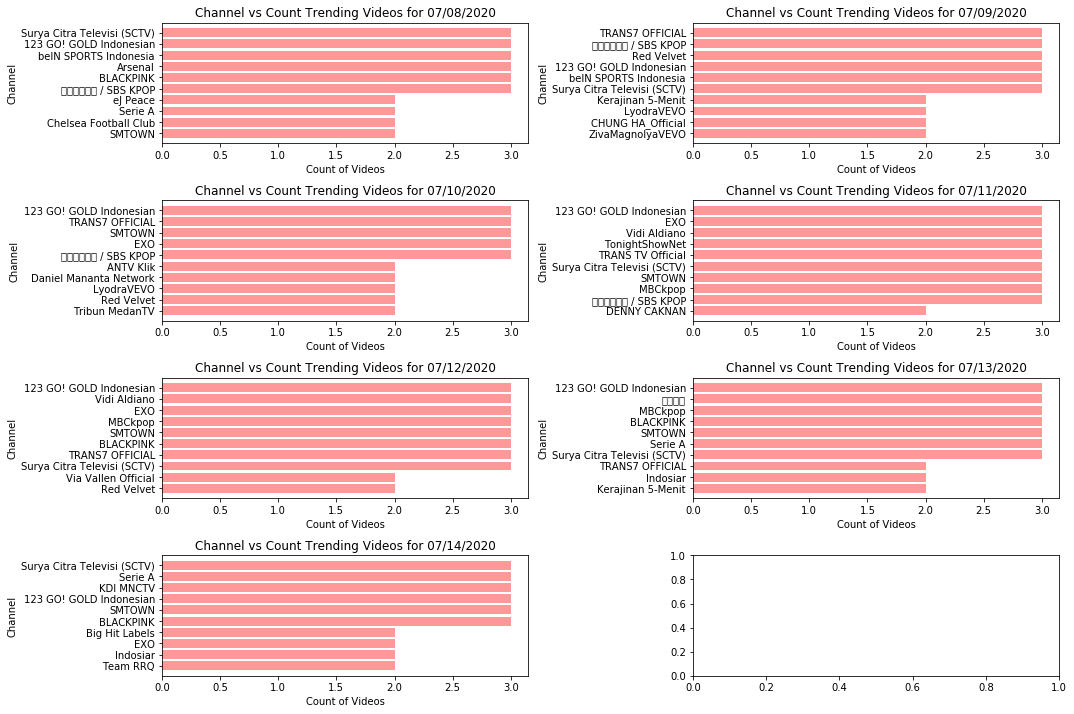

In [22]:
fig, ax = plt.subplots(math.ceil(len(np.unique(df['trending_date']))/2),2, figsize=(15,10))
ax = ax.ravel()

for ind, date in enumerate(np.unique(df['trending_date'])):
    temp = df[df['trending_date'] == date]
    temp = temp.groupby(['channelTitle']).agg('count')['video_id'].reset_index()
    temp.sort_values('video_id', inplace = True, ascending = False)
    temp = temp[0:10]
        
    ax[ind].barh(temp['channelTitle'], temp['video_id'], color = 'r', alpha = 0.4)
    ax[ind].invert_yaxis()
    ax[ind].set_xlabel('Count of Videos')
    ax[ind].set_ylabel('Channel')
    ax[ind].set_title('Channel vs Count Trending Videos for ' + date.strftime('%m/%d/%Y'));

fig.tight_layout(pad = 1)

Here, we can see that one channel can have multiple trending videos (up to 3) in each day with "123 GO! GOLD Indonesian" being the most consitent channel to have 3 trending videos across the week.

#### 2. Weekly Data EDA

##### 2a. Video Data Analysis

##### 2.1 Which are the most popular video categories across the week?

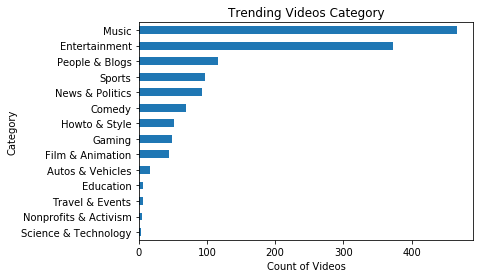

In [23]:
df['categoryIdName'].value_counts().plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Count of Videos')
plt.ylabel('Category')
plt.title('Trending Videos Category');

Here we observe that Music and Entertainment videos dominate the trending list. These two categories comprise of 62% of trending videos.

##### 2.2 How long do trending videos stay trending?

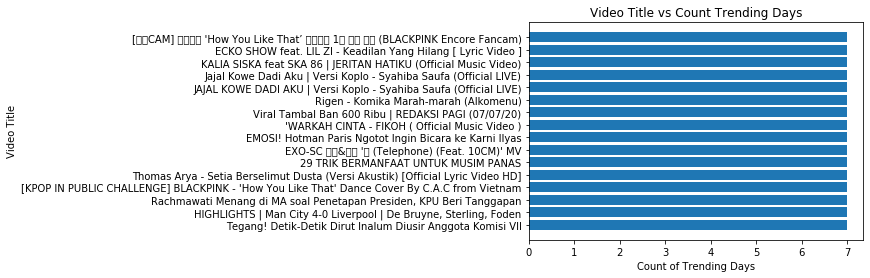

In [24]:
temp = df.groupby(['video_id']).agg('count')['trending_date'].reset_index()
temp.sort_values('trending_date', inplace = True, ascending = False)
temp = temp[0:15]
temp2 = df[['video_id', 'title']].drop_duplicates()

temp = pd.merge(temp, temp2, how = 'inner', on = 'video_id')

plt.barh(temp['title'], temp['trending_date'].astype(int))
plt.gca().invert_yaxis()
plt.xlabel('Count of Trending Days')
plt.ylabel('Video Title')
plt.title('Video Title vs Count Trending Days');

In [25]:
temp = df.groupby(['video_id']).agg('count')['trending_date'].reset_index()
temp.sort_values('trending_date', inplace = True, ascending = False)
max_trending_date = np.max(temp['trending_date'])
temp2 = temp[temp['trending_date'] == max_trending_date]
print('Trending during all data collection period: ', temp2.shape[0] * 100 / temp.shape[0], '%')
print('Unique Videos across period: ', temp.shape[0])

Trending during all data collection period:  11.11111111111111 %
Unique Videos across period:  423


Interestingly, trending videos tend to remain trending for more than 1 day. In fact, 11.1% of all trending videos are trending across the whole data collection period of 1 week. This has resulted in a possible of only 423 unique videos of the possible 1400 unique video. Due to the short data collection period, this does not give an accurate result of how long these videos remain trending. Some users have even reported that a video can remain trending for up to 30 days!

##### 2.3 How long does it take for videos to become trending after being published?

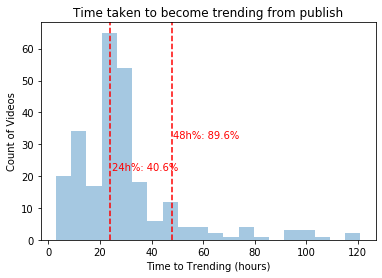

In [28]:
# filter only videos that are published after the data collection period
temp = no_dups_f[no_dups_f['publishedAt'] >= '2020-07-07'].copy()
temp['time_to_trend'].hist(bins = 20, alpha = 0.4)
plt.axvline(24, color='r', linestyle='--')
twenty_four = round((temp[temp['time_to_trend'] <= 24].shape[0] / temp.shape[0]) * 100,1)
plt.text(24.5,22, '24h%: ' + str(twenty_four) + '%', color = 'r')
plt.axvline(48, color='r', linestyle='--')
fourty_eight = round((temp[temp['time_to_trend'] <= 48].shape[0] / temp.shape[0]) * 100,1)
plt.text(48.5,32, '48h%: ' + str(fourty_eight) + '%', color = 'r')

plt.xlabel('Time to Trending (hours)')
plt.ylabel('Count of Videos')
plt.title('Time taken to become trending from publish');
plt.grid(b=None);

In [27]:
print('Sample size used for this analysis: ', temp.shape[0])

Sample size used for this analysis:  251


Due to the short data collection period, only videos which have published date shorly before the data collection period is used. Therefore, this might not paint an accurace picture of the time taken to trending. <br/>

In this chart, we see that a majority of the videos which are trending are those that are published within 48 hours. In fact almost 90% trending videos are those published within 48 hours, and roughly 40% are those that are published within 24 hours. So, the first few hours are critical to determine whether a video becomes trending or not.

##### 2.4 What is the most common time to publish trending videos?

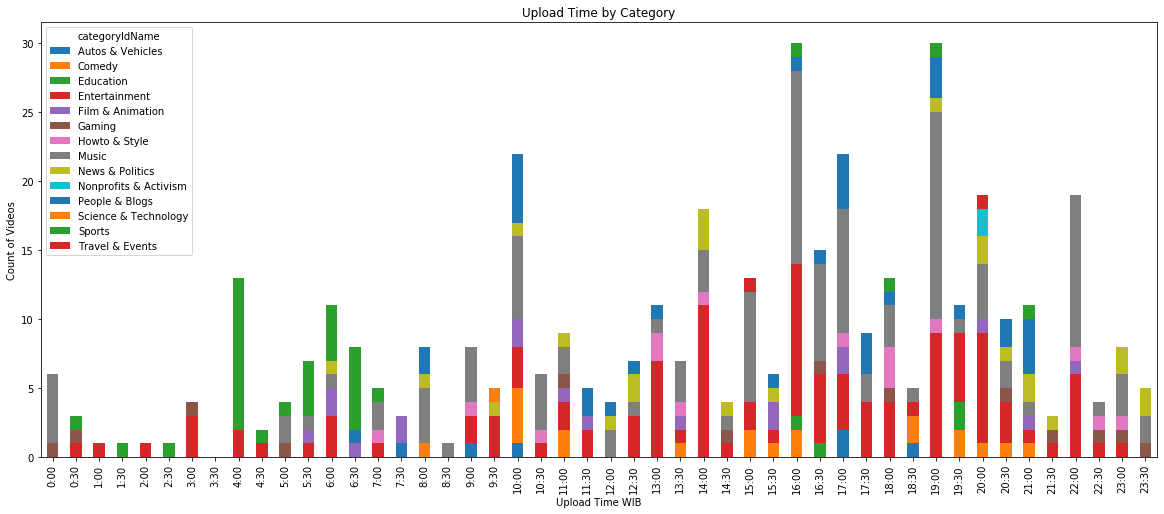

In [29]:
def create_bins():
    ans = []
    for i in range(24):
        ans.append(str(i) + ':00')
        ans.append(str(i) + ':30')
    return ans
bins = create_bins()
count_bins = pd.DataFrame()
count_bins['bins'] = bins

temp = no_dups_f.groupby(['publish_cat', 'categoryIdName']).agg('count')['title'].reset_index()
count_bins = pd.merge(count_bins, temp, left_on = 'bins', right_on = 'publish_cat', how = 'left')
count_bins.drop(['publish_cat'], axis = 1, inplace = True)
count_bins['title'] = count_bins['title'].fillna(0)
count_bins['title'] = count_bins['title'].astype(int)
bins_pivot = count_bins.pivot(index='bins', columns='categoryIdName', values='title')
bins_pivot = bins_pivot.reindex(bins)
bins_pivot.loc[:,'Autos & Vehicles':].plot.bar(stacked=True, figsize=(20,8))
plt.xlabel('Upload Time WIB')
plt.ylabel('Count of Videos')
plt.title('Upload Time by Category');

From the chart we observe that a majority of the videos are published at both 16:00 and 19:00 which is after the working hours. Looking at the breakdown further, majority of the music and entertainment videos (the two biggest categories) tend to be published between the peak hours of 14:00 and 20:00 to ensure high user engagement. Meanwhile, the third biggest category (People & Blogs), tend to publish anytime between 8:00 to 21:00. Interstingly, a majority fo sport videos (fourth biggest category) tend to be published early in the morning before 7:30am. One primary reason for this phenomenon is that almost all of the trending sport videos came from one topic which is the european soccer leagues. The highlight videos of the matches tend to be published shorly after the game is played which results in the peak of 4:00 to 6:30 for sports videos.

##### 2.5 What is the most viewed/liked/disliked/commented videos among all trending videos?

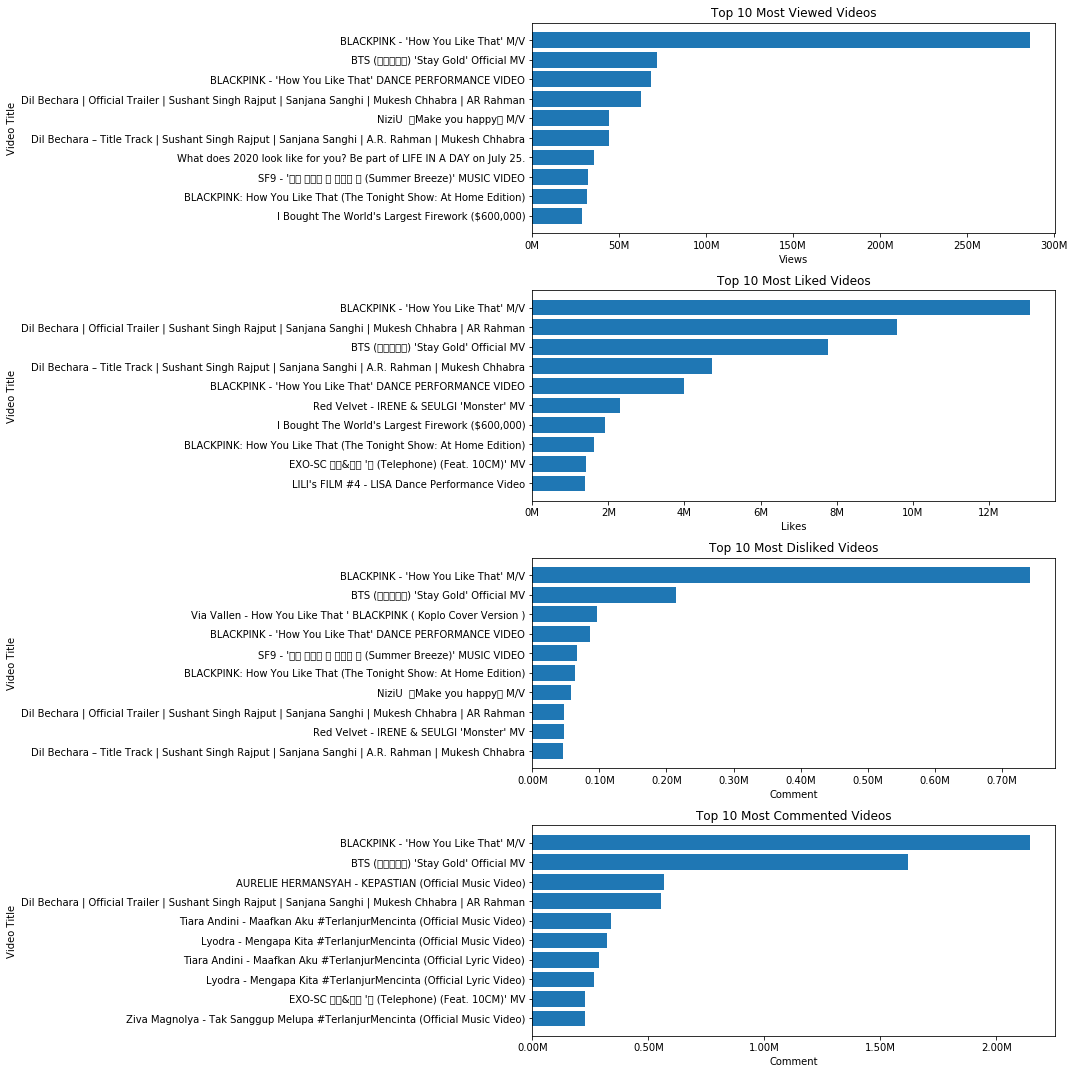

In [30]:
temp = no_dups_l.sort_values('view_count', ascending = False)
temp = temp[0:10]
fig, ax = plt.subplots(4,1, figsize = (15,15))
ax[0].barh(temp['title'], temp['view_count'])
xlabels = ['{:,.0f}'.format(x) + 'M' for x in ax[0].get_xticks()/1000000]
ax[0].invert_yaxis()
ax[0].set_xlabel('Views')
ax[0].set_ylabel('Video Title')
ax[0].set_title('Top 10 Most Viewed Videos');
ax[0].set_xticklabels(xlabels);


temp = no_dups_l.sort_values('likes', ascending = False)
temp = temp[0:10]
ax[1].barh(temp['title'], temp['likes'])
xlabels = ['{:,.0f}'.format(x) + 'M' for x in ax[1].get_xticks()/1000000]
ax[1].invert_yaxis()
ax[1].set_xlabel('Likes')
ax[1].set_ylabel('Video Title')
ax[1].set_title('Top 10 Most Liked Videos');
ax[1].set_xticklabels(xlabels);

temp = no_dups_l.sort_values('dislikes', ascending = False)
temp = temp[0:10]
ax[2].barh(temp['title'], temp['dislikes'])
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax[2].get_xticks()/1000000]
ax[2].invert_yaxis()
ax[2].set_xlabel('Comment')
ax[2].set_ylabel('Video Title')
ax[2].set_title('Top 10 Most Disliked Videos');
ax[2].set_xticklabels(xlabels);

temp = no_dups_l.sort_values('comment_count', ascending = False)
temp = temp[0:10]
ax[3].barh(temp['title'], temp['comment_count'])
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax[3].get_xticks()/1000000]
ax[3].invert_yaxis()
ax[3].set_xlabel('Comment')
ax[3].set_ylabel('Video Title')
ax[3].set_title('Top 10 Most Commented Videos');
ax[3].set_xticklabels(xlabels);

fig.tight_layout(pad = 1)

One of the top videos "BLACKPINK - 'How You Like That' M/V" has dominated all the other videos in terms of number of views with more than 250M views. It is also interesting to observe that a majority of the videos in the top 10 views belongs to the music and entertainment category dominated by KPOP group bands (Blackpink, BTS, SF9), JPOP bands (NiziU), Bollywood movies (Dil Bechara) which cater to international audiences instead of indonesians. Analyzing the likes and dislikes of each videos, it would be apparent that the higher number of views would correlate to both high number of likes and dislikes. From the charts this general trend holds but with few surprises. In the most liked category, "Red Velvet - IRENE & SEULGI 'Monster' MV" was ranked 6th in terms of nubmer of likes but was not present in the top 10 views which implies a higher like to view ratio for this video. In the contrary, for the disliked category, "Via Vallen - How You Like That BLACKPINK (Koplo Cover Version)" was ranked 3rd for disliked. May be people do not like the 'Koplo' version of the song! Next, looking at the comments several surprising indonesian videos appear especially with the videos tagged with #TerlanjurMencinta. What is interesting here is that Indonesian 'Netizens' do live up to its reputation of being the comment kings. However, just a brief look at the comments show that a some of them are spams words like "TRENDING", "MANTAP", "OTW TRENDING NO1", "GO GO LIKE LIKE KOMEN". Just take a look at the screenshot below!

<table><tr>
<td> <img src="external_images/youtube_comments.JPG" width="200" height = "150", style="margin-right:50px"/> </td>
<td> <img src="external_images/youtube_comments2.JPG" width="550" height = "550"/> </td>
</tr></table>

##### 2.6 How does the Like/Dislike ratio compare for videos?

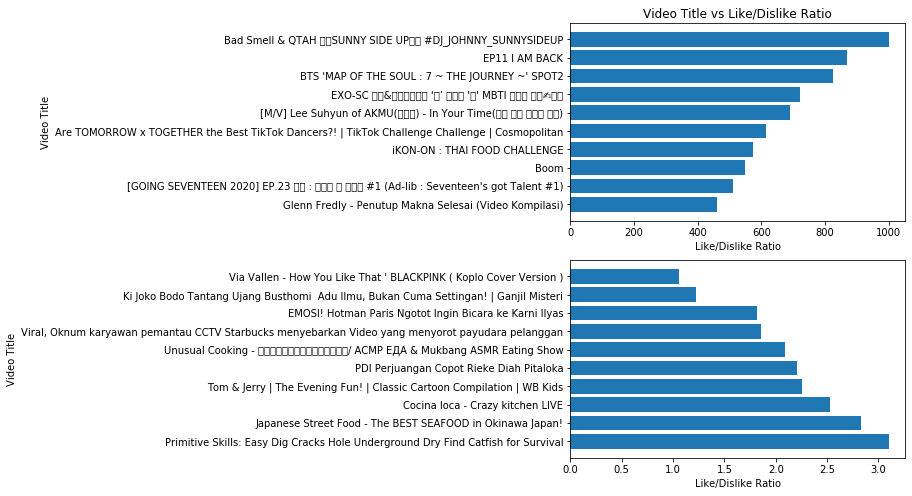

In [31]:
temp = no_dups_l.copy()
temp['like_dislike_ratio'] = temp['likes'] / temp['dislikes']
temp = temp.sort_values('like_dislike_ratio', ascending = False)
temp_1 = temp[0:10]
fig, ax = plt.subplots(2,1, figsize = (6,8))
ax[0].barh(temp_1['title'], temp_1['like_dislike_ratio'])
ax[0].invert_yaxis()
ax[0].set_xlabel('Like/Dislike Ratio')
ax[0].set_ylabel('Video Title')
ax[0].set_title('Video Title vs Like/Dislike Ratio');

temp = temp.sort_values('like_dislike_ratio', ascending = True)
temp_2 = temp[0:10]
ax[1].barh(temp_2['title'], temp_2['like_dislike_ratio'])
ax[1].invert_yaxis()
ax[1].set_xlabel('Like/Dislike Ratio')
ax[1].set_ylabel('Video Title')

fig.tight_layout(pad = 1)

Analyzing by the number of likes and dislikes alone is not enough as high number of likes and dislikes tend to correlate with high viewer count. Looking at the videos with a high Like/Dislike ratio will show what Youtube viewers liked. It is interesting to observe that videos that appear in the top10 likes do not appear in the top10 like/dislike ratio. Instead,  videos from KPOP bands (BTS, EXO-SC), Korean DJ JOHNNY SUNNYSIDEUP, Tik-Tok compilations, and Indonesian music legend Glenn Fredly appeared in the Top10 list for likes/dislike ratio. An interesting pattern to observe is that the majority of the videos originated from abroad (not from Indonesia). On the contrary, looking at the videos with low like/dislike ratio, we observe that a majority of them originated from Indonesia. Unsurprisingly, Via Vallen's Koplo Cover appeared again here as the video with the lowest like/dislike ratio. The second to last ranked video falls under the category of politics which contributed to its low ranking, while the third lowest ranked video shows a bad act done by a Starbucks employee.    

##### 2.6 What is the correlation of view_count, likes, dislikes, comment_count, and curr_subscribers?

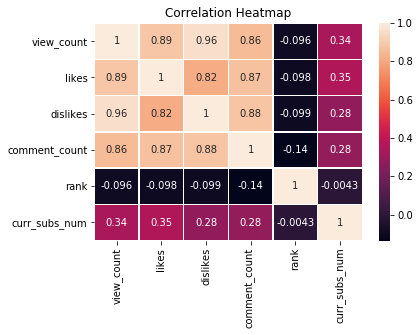

In [32]:
temp = no_dups_l[['view_count', 'likes', 'dislikes', 'comment_count', 'rank', 'curr_subs_num']].corr()
sns.heatmap(temp, annot=True, linewidths=.5)
plt.title('Correlation Heatmap');

It is interesting here to note that views are highly correlated with the number of dislikes! The higher the number of dislikes the higher the views of the videos. Even though Youtube viewers might not like the videos, viewers are still curios are willing to watch the videos. Logically, it also makes sense for viewer count to be highly positvely correlated with number of likes and comments as stated in the previous analysis, while being negatively correlated with the trending rankings. What's surprising is the correlation with current subscribers. One might hypothesize that having high number of subscribers will lead to more views. While it might be partially true, viewer count does not significantly correlate with current number of subscribers because one viral video will significantly increase views. Also ranks in the trending list have almost a 0 correlation with the number of views. Several reason for this phenomenon might include that the video has been on the trending list and has significantly moved down the list.

#### 2b. Channel Data Analysis

##### 2.7 What is the distribution of subsribers for channels with trending videos?

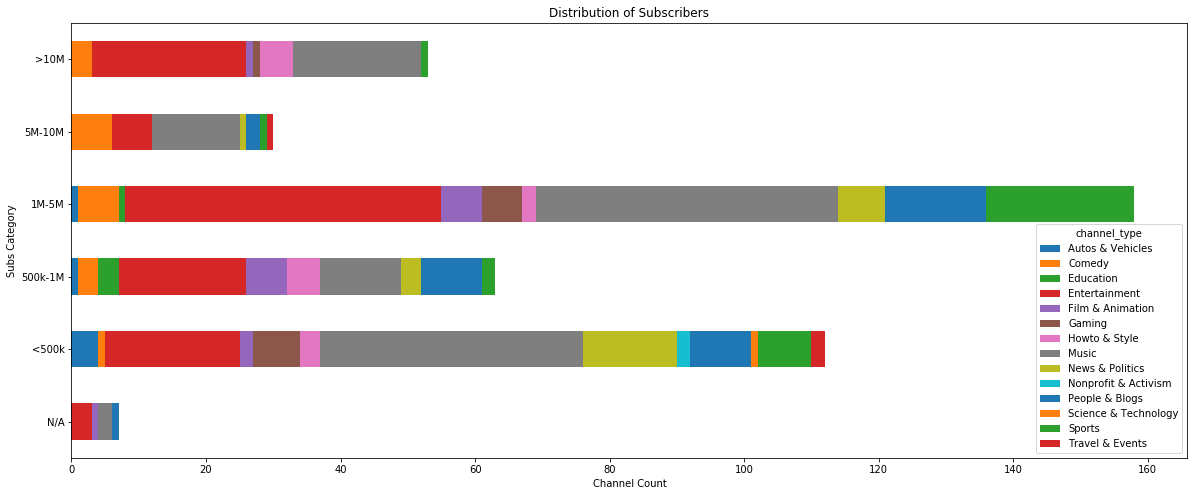

In [33]:
temp = no_dups_l.copy()
temp = temp.groupby(['curr_subs_cat', 'channel_type']).agg('count')['title'].reset_index()
temp.sort_values('title', inplace = True, ascending = False)

def replace_empty(x):
    if x == '':
        return 'N/A'
    else:
        return x
    
temp['curr_subs_cat'] = temp['curr_subs_cat'].apply(lambda x: replace_empty(x))
temp['title'] = temp['title'].astype(int)
temp = temp.pivot(index='curr_subs_cat', columns='channel_type', values='title')
temp = temp.reindex(['>10M', '5M-10M', '1M-5M', '500k-1M', '<500k', 'N/A'])

temp.plot.barh(stacked=True, figsize=(20,8))
plt.gca().invert_yaxis()
plt.xlabel('Channel Count')
plt.ylabel('Subs Category')
plt.title('Distribution of Subscribers');

As described in the previous analysis, current subscriber count is not a sole predictor in terms of number of views with a correlation of 0.34. So, small channels and content creators you can also compete with big channels to be on the trending list! Looking at the chart above, it is evident that trending videos originate from multiple sources with the most common category being 1M-5M subscribers count, and the second most common category being <500k subscribers. Although trending videos will have different impact towards the channel, it does create a significant impact for increased exposure for smaller channels to aim for that Silver (100k Subs) or Gold (1M Subs) play button. The categories with N/A information for subscribers are those that have private profile on Socialblade.com.

##### 2.8 What is the distribution of socialblade rank with trending videos?

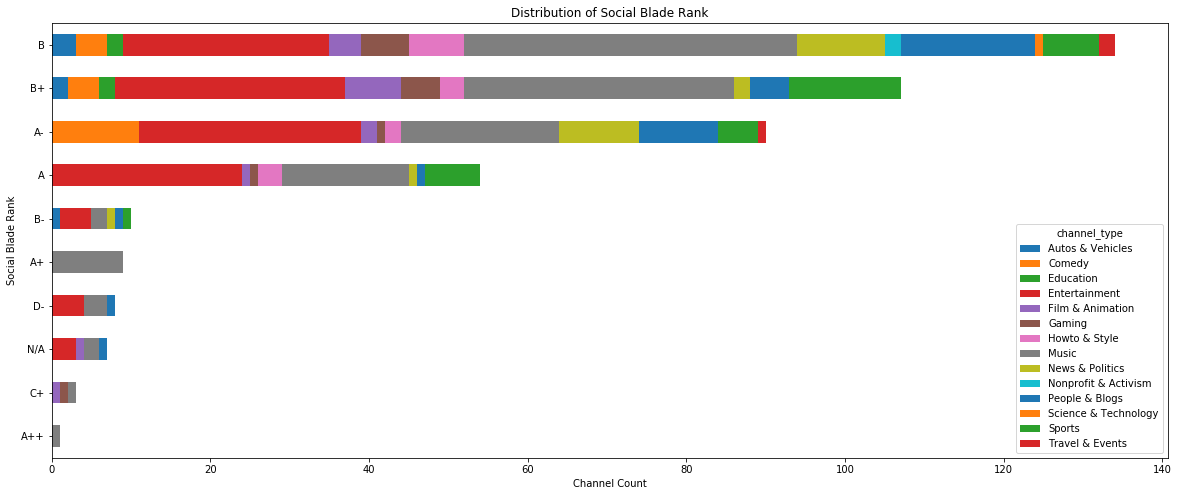

In [34]:
temp = no_dups_l.groupby(['rank_y', 'channel_type']).agg('count')['video_id'].reset_index()
temp.sort_values('video_id', inplace = True, ascending = False)
def replace_empty(x):
    if x == '':
        return 'N/A'
    else:
        return x
    
temp['rank_y'] = temp['rank_y'].apply(lambda x: replace_empty(x))
temp['video_id'] = temp['video_id'].astype(int)
temp = temp.pivot(index='rank_y', columns='channel_type', values='video_id')

a = no_dups_l.groupby(['rank_y']).agg('count')['video_id'].reset_index()
a.sort_values('video_id', inplace = True, ascending = False)
a['rank_y'] = a['rank_y'].apply(lambda x: replace_empty(x))
temp = temp.reindex(a['rank_y'])

temp.plot.barh(stacked=True, figsize=(20,8))
plt.gca().invert_yaxis()
plt.xlabel('Channel Count')
plt.ylabel('Social Blade Rank')
plt.title('Distribution of Social Blade Rank');

What is the SocialBlade Rank? According to the their official website, the ranking system aims to measure the channel's influence based on average view counts, and other factors. This statement implies that if a channel has a A++, A+, A, A- on the SocialBlade rankings, it is considered to be an influential channel on Youtube. From the charts, one can observe that A++, A+, A, A- rankings only comprise of a signinificant proportion of channels whose videos are trending. Interestingly, a majority of channels that belong to this elite categories primarily come from the Entertainment and Music channel type (first and second biggest channel category) which might explain the high influence of music and entertainment towards Youtube or even the world. However, acheiving this elite status can be quite difficult, and a majority of the channel belongs to the B and B+ category. In conclusion, being in SocialBlade's A and B rankings will help your chances of being in the trending list. 

##### 2.9 Which country does the trending video channels originate?

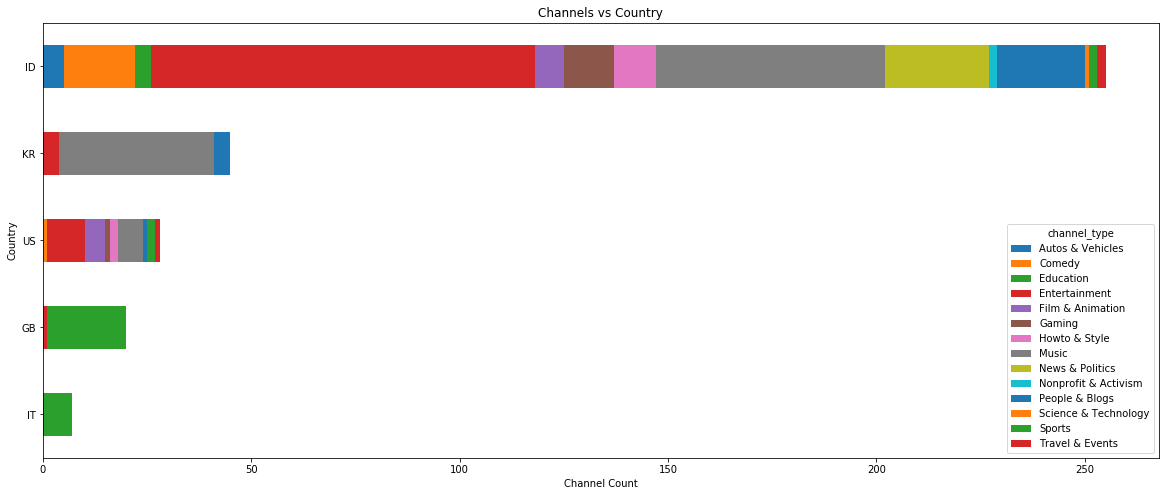

In [35]:
temp = no_dups_l.groupby(['country', 'channel_type']).agg('count')['video_id'].reset_index()
temp.sort_values('video_id', inplace = True, ascending = False)
def replace_empty(x):
    if x == '':
        return 'N/A'
    else:
        return x
    
temp['country'] = temp['country'].apply(lambda x: replace_empty(x))
temp['video_id'] = temp['video_id'].astype(int)
temp = temp.pivot(index='country', columns='channel_type', values='video_id')

a = no_dups_l.groupby(['country']).agg('count')['video_id'].reset_index()
a.sort_values('video_id', inplace = True, ascending = False)
a['country'] = a['country'].apply(lambda x: replace_empty(x))
temp = temp.reindex(a['country'])
temp = temp[temp.index != 'N/A'] 
temp = temp[0:5]

temp.plot.barh(stacked=True, figsize=(20,8))
plt.gca().invert_yaxis()
plt.xlabel('Channel Count')
plt.ylabel('Country')
plt.title('Channels vs Country');

The chart above shows the origin of channels whose videos are on the trending list. Unsurprisingly, a majority of theses channels originate from Indonesia which is local to the region. In the next few places comes South Korea with its KPOP music videos, US with various entertainment videos, GB with English Premier League soccer highlights, and IT with Serie A soccer highlights. Therefore, being local to a region will increase your chances of being on the list!

#### 3. Effect of trending on channel video views

##### 3.1 What is the effect of being on the trending list on channel video views?

In [41]:
top_10 = no_dups_f[no_dups_f['rank'].isin(range(1,51))]  #take top50 trending
top_10 = top_10[top_10['trending_date'] < '2020-07-13']  #not including this date because day is not finished

In [64]:
# since there is not enough data, assume that first trending is 24 hours after publish date and remain that way.
# because from previous analysis, it is said that trending videos tend to be there within 24 hours
# not including publishdate here
def avg_prior(x):
    pub_date = x['publishedAt'].date() + datetime.timedelta(hours = 12)
    date_prior = []
    for i in range(1,4):
        temp = pub_date - datetime.timedelta(days=i)
        temp = temp.strftime('%Y-%m-%d')
        date_prior.append(temp)
    
    avg_views = []
    for elem in date_prior:
        if elem in x['past_view_gains']:
            avg_views.append(x['past_view_gains'][elem])    
    return np.average(avg_views)

# after trending take average of after published to current trending date
# include publish date here
def after_trend(x):
    pub_date = x['publishedAt'].date()
    trend_date = x['trending_date'].date()
    
    dates_after = []
    if trend_date == pub_date:
        dates_after.append(trend_date.strftime('%Y-%m-%d'))
    else:
        diff_days = (trend_date - pub_date).days
        for i in range(diff_days + 1):
            temp = pub_date + datetime.timedelta(days=i)
            temp = temp.strftime('%Y-%m-%d')
            dates_after.append(temp)
    
    avg_views = []
    for elem in dates_after:
        if elem in x['past_view_gains']:
            avg_views.append(x['past_view_gains'][elem])    
    return np.average(avg_views)
    

top_10['before_trending'] = top_10.apply(lambda x: avg_prior(x), axis = 1)
top_10['after_trending'] = top_10.apply(lambda x: after_trend(x), axis = 1)
top_10['avg_inc'] = (top_10['after_trending'] - top_10['before_trending']) * 100 / top_10['before_trending']

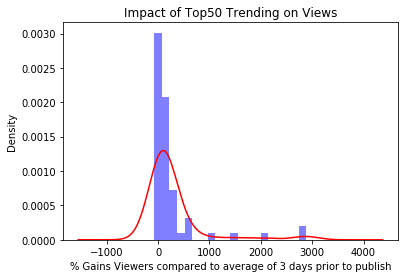

In [65]:
top_10['avg_inc'].hist(bins = 20, color = 'b', alpha = 0.5, density = True)
top_10['avg_inc'].plot.kde(color = 'r')
plt.xlabel('% Gains Viewers compared to average of 3 days prior to publish')
plt.title('Impact of Top50 Trending on Views');

In [66]:
print('sample size: ', top_10.shape[0])
print('mean: ', np.nanmean(top_10['avg_inc']), '%')
print('median: ', np.nanmedian(top_10['avg_inc']), '%')
print('min: ', np.nanmin(top_10['avg_inc']), '%')
print('max: ', np.nanmax(top_10['avg_inc']), '%')

sample size:  80
mean:  279.3787873445386 %
median:  105.982861997533 %
min:  -74.56817866007667 %
max:  2888.3305834708262 %


In [69]:
top_10[top_10['avg_inc'] > 1000]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,rank,categoryIdName,channelid,rank_y,num_videos,curr_subs,total_views,country,channel_type,past_view_gains,monthly_subs_gain,monthly_views,weekly_subs_gain,weekly_view,time_to_trend,publish_cat,curr_subs_num,curr_subs_cat,title_len,title_cleaned,desc_cleaned,before_trending,after_trending,avg_inc
211,yClGpsAUm84,EXO-SC 세훈&찬열 'Nothin’' Track MV (CHANYEOL Solo),2020-07-08 22:00:19+00:00,UCzCedBCSSltI1TFd3bKyN6g,EXO,10,2020-07-09 20:00:00+00:00,EXO|엑소|찬열|CHANYEOL|세훈&찬열|EXO-SC|Nothin|Nothin ...,1577155,504597,1227,74104,https://i.ytimg.com/vi/yClGpsAUm84/default.jpg,False,False,EXO-SC’s 1st album 10억뷰 (1 Billion Views) will...,12,Music,UCzCedBCSSltI1TFd3bKyN6g,B,138,5.84M,96994189,KR,Music,"{'2020-07-01': 141634, '2020-07-02': 144004, '...","{'2020-06-30': 200000, '2020-05-31': 270000, '...","{'2020-06-30': 6256532, '2020-05-31': 13398009...","{'2019-07-01': 74195, '2019-07-08': 88988, '20...","{'2019-07-01': 1520640, '2019-07-08': 3076133,...",21.983333,22:00,5840000,5M-10M,7,"[exosc, nothin, track, mv, chanyeol, solo]","[exoscs, 1st, album, 10, billion, views, relea...",128805.000000,2116285.0,1543.014635
418,6U-4Y17xMRY,LILI's FILM #4 - LISA Dance Performance Video,2020-07-10 16:00:01+00:00,UC35HKvKYPkri4Grd5KXl3wQ,Lilifilm Official,24,2020-07-10 20:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,2249354,831807,4782,57458,https://i.ytimg.com/vi/6U-4Y17xMRY/default.jpg,False,False,"Music by Chris Brown, Young Thug - City GirlsF...",19,Entertainment,UC35HKvKYPkri4Grd5KXl3wQ,B+,9,3.58M,105773572,,Entertainment,"{'2020-07-01': 194709, '2020-07-02': 196249, '...","{'2020-06-30': 130000, '2020-05-31': 170000, '...","{'2020-06-30': 7656783, '2020-05-31': 12148011...","{'2019-07-01': 120433, '2019-07-08': 11514, '2...","{'2019-07-01': 589744, '2019-07-08': 140169, '...",3.983333,16:00,3580000,1M-5M,7,"[lilis, film, lisa, dance, performance, video]","[music, chris, brown, young, thug, city, girls...",280616.666667,6103810.0,2075.141652
614,dEz8_1fD6IA,Sebuah Rumah di Ngawi Berubah Ketinggiannya da...,2020-07-10 07:46:42+00:00,UCJihkOSfgpDz_HHhkb-OGLQ,Buletin iNews,25,2020-07-11 20:00:00+00:00,Berita Terkini|Breaking News|TV Berita|Berita ...,2182407,13727,1139,2765,https://i.ytimg.com/vi/dEz8_1fD6IA/default.jpg,False,False,Tanggal Tayang: 09/07/2020Program berita haria...,15,News & Politics,UCJihkOSfgpDz_HHhkb-OGLQ,B,10427,74.9K,28669406,ID,News & Politics,"{'2020-07-01': 60852, '2020-07-02': 67105, '20...","{'2020-06-30': 6700, '2020-05-31': 10400, '202...","{'2020-06-30': 2951744, '2020-05-31': 4211528,...","{'2019-08-08': 76, '2019-08-12': 176, '2019-08...","{'2019-08-08': 14819, '2019-08-12': 40528, '20...",36.216667,8:00,74900,<500k,10,"[rumah, ngawi, berubah, ketinggiannya, semalam...","[tanggal, tayang, 09072020program, berita, har...",100439.666667,1180751.0,1075.582356
623,PpbdRemtXmY,Mahalini X Nuca - Kulakukan Semua Untuk Mu (Co...,2020-07-10 19:00:14+00:00,UCWt9ZiAG3-6WkqE092qktYw,Raja Giannuca Official,24,2020-07-11 20:00:00+00:00,Nuca|Raja Giannuca|Nuca Idol|Indonesian idol|i...,446522,77000,749,26115,https://i.ytimg.com/vi/PpbdRemtXmY/default.jpg,False,False,"Hi Kawan!, ini hasil latihan nyanyi ku dengan ...",24,Entertainment,UCWt9ZiAG3-6WkqE092qktYw,B-,14,65.8K,2052820,ID,Entertainment,"{'2020-06-29': 2071, '2020-06-30': 77254, '202...","{'2020-06-30': 7700, '2020-05-31': 2900, '2020...","{'2020-06-30': 251036, '2020-05-31': 131614, '...","{'2020-03-14': 500, '2020-03-16': 5900, '2020-...","{'2020-03-14': 0, '2020-03-16': 53997, '2020-0...",24.983333,19:00,65800,<500k,9,"[mahalini, nuca, kulakukan, mu, cover, version]","[hi, kawan, hasil, latihan, nyanyi, ku, raharj...",10260.000000,302552.5,2848.854776
818,GciWA1HMtbk,BAPERR!! DINDA HAUW & REY MBAYANG MENIKAH (FULL),2020-07-12 09:54:55+00:00,UC5UQ5GlSSpZDpZiVij5bWUw,Anisa Rahm

Here, we want to analyze the effect on views on being in the top50 trending list. Due to the limited data available, we assume that when the videos was first published, within 24 hours, it immediately became trending. Taking the channel views 3 days average after the video is publish and 7 day average after being published (if available), we can compare the increase in daily viewers for the channel. <br/>
On average, being on the top50 trending list will increase daily channel viewers by around 105%. However, the increase in views is not guaranteed. For example, there are channels whose views decreased after becoming trending. One potential reason for this phenomenon include a trending video (released several days prior) that is more powerful in terms of trending power thereby decreasing the trending power of the current trending video. In contrast, trending videos could have a significant impact to increase channel video views by more than 250% compared to prior 3 days average views. Lilifilm's channel views has seen daily video views shot up from ~200k to ~2M daily viewers due to the new video LILI's FILM #4 LISA Dance Performance Video. Just take a look at the screenshot below! (taken from socialblade.com)

<img src="external_images/social_blade_lilifilm.JPG" width="600" height = "600"/>

#### 4. Text Data Analysis on Weekly Data

##### 4.1 What is the distribution of the title lengths for trending videos?

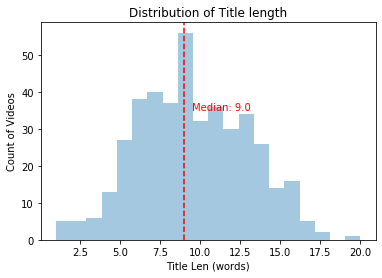

In [70]:
no_dups_l['title_len'].hist(bins = 20, alpha = 0.4)
plt.axvline(np.nanmedian(no_dups_l['title_len']), color='r', linestyle='--')
plt.text(np.nanmedian(no_dups_l['title_len']) + .5, 35, 'Median: ' + str(np.nanmedian(no_dups_l['title_len'])), 
         color = 'r')
plt.xlabel('Title Len (words)')
plt.ylabel('Count of Videos')
plt.title('Distribution of Title length');
plt.grid(b=None);

In [71]:
print('sample size: ', len(no_dups_l['title_len']))
print('mean: ', np.nanmean(no_dups_l['title_len']), ' words')
print('median: ', np.nanmedian(no_dups_l['title_len']), ' words')
print('min: ', np.nanmin(no_dups_l['title_len']), ' words')
print('max: ', np.nanmax(no_dups_l['title_len']), ' words')

sample size:  423
mean:  9.49645390070922  words
median:  9.0  words
min:  1  words
max:  20  words


Do trending videos have wordy title or just a short sweet title? From the analysis conducted in the chart above, we observe that on average trending video titles has 9 words, with ssome videos having as little as 1 word title (eg. "Boom"), and a maximum of 20 words. Next,, we will look at the most common words in the titles, descriptions, and tags. 

##### 4.2 Word Cloud on most common words on Title/Descriptions/Tags

###### 4.2.1 Most common word on Title

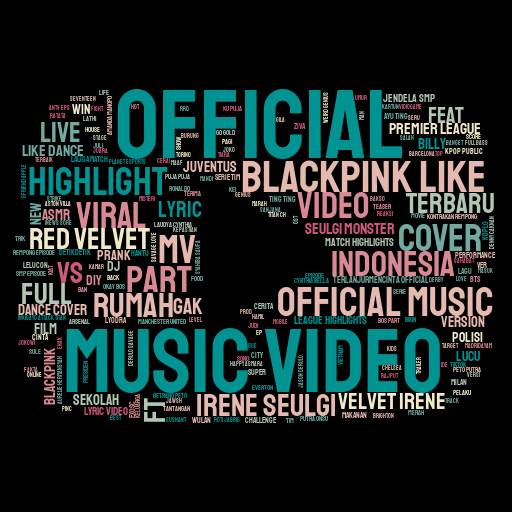

In [72]:
temp = no_dups_l.copy()
temp['cleaned_text'] = temp['title_cleaned'].apply(lambda x: ' '.join(x))
long_string = ','.join(list(temp['cleaned_text'].values))
stylecloud.gen_stylecloud(text=long_string, icon_name='fab fa-youtube', max_words=200, 
                          palette='cartocolors.diverging.TealRose_7', background_color="black", 
                          output_name='yt-title-words.png')
Image.open('yt-title-words.png')

From the word cloud we can easily observe that BLACKPINK, MUSIC VIDEO are the two most common words among all videos. Looking at all the title of trending videos breifly, we can observe that multiple videos showcases BLACKPINK's official music videos, and also several musical cover of Blackpink's songs. The word HIGHLIGHT also appears in relation to the european soccer match highlights which are very popular in Indonesia.

###### 4.2.2 Most common word on Description

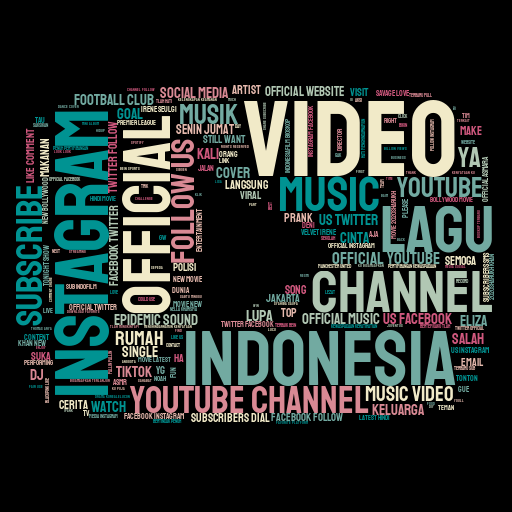

In [73]:
temp = no_dups_l.copy()
temp['cleaned_text'] = temp['desc_cleaned'].apply(lambda x: ' '.join(x))
long_string = ','.join(list(temp['cleaned_text'].values))
stylecloud.gen_stylecloud(text=long_string, icon_name='fab fa-youtube', max_words=200, 
                          palette='cartocolors.diverging.TealRose_7', background_color="black", 
                          output_name='yt-desc-words.png')
Image.open('yt-desc-words.png')

In terms of the most common words for the description, social media platform and its action words appear. For example, words like SUBSCRIBE, FOLLOW US, YOUTUBE CHANNEL, INSTAGRAM encourages viewers of the video to consistenly follow the channel. 

###### 4.2.3 Most common word on Tags

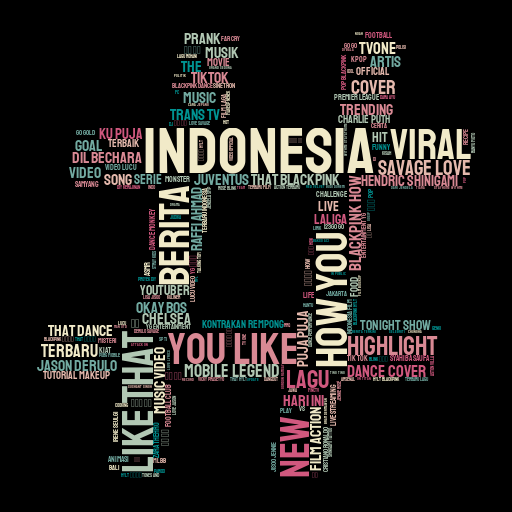

In [74]:
temp = no_dups_l.copy()
def tags_split(x):
    if x == '[none]':
        return []
    else:
        return x.split('|')

temp['tags_split'] = temp['tags'].apply(lambda x: tags_split(x))
temp['cleaned_text'] = temp['tags_split'].apply(lambda x: ' '.join(x))
long_string = ','.join(list(temp['cleaned_text'].values))
stylecloud.gen_stylecloud(text=long_string, icon_name='fas fa-hashtag', max_words=200, 
                          palette='cartocolors.diverging.TealRose_7', background_color="black", 
                          output_name='yt-tags-words.png')
Image.open('yt-tags-words.png')

In terms of the tags, it is interesting to note tha words like BLACKPINK does not dominate. Instead, Indonesia is the most dominant word as majority of the videos originate from Indonesia. However, words like HOW YOU, YOU LIKE, LIKE THAT referenced Blackpink's new music video of "How You Like That".

#### 5. Topic Modelling

##### 5.1 LDA Model

**What is LDA Model?**
    - LDA Model is a topic modelling algorithm which classifies text in a document to a particular topic. LDA builds topics per document and words per topic model modelled by the Dirichlet distribution
Learn more here: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [75]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import gensim

In [76]:
data_words = no_dups_l['title_cleaned'].values

# build the dictionary and convert the documents 
# to bag of words (bow) representation using the dictionary
texts_dictionary = corpora.Dictionary(data_words)
texts_corpus = [texts_dictionary.doc2bow(text) for text in data_words]

vocab = list(texts_dictionary.values()) #list of terms in the dictionary
print('Unique words in Vocabulary: ', len(vocab))

Unique words in Vocabulary:  1783


In [82]:
# train the model the more iteration, the more stable the model becomes, but of course takes longer to train
num_topics = [3,5,7,10]
coherences = []
models = []

for k in num_topics:
    print('Modelling ', k, ' topics')
    lda_model = LdaModel( 
        texts_corpus, 
        random_state = 42,
        id2word = texts_dictionary, 
        num_topics = k,
        passes = 50,
        alpha = 'auto',
        eta = 'auto')
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, 
                                         dictionary=texts_dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherences.append(coherence_score)
    models.append(lda_model)

Modelling  3  topics
Modelling  5  topics
Modelling  7  topics
Modelling  10  topics


In [83]:
for ind, k in enumerate(num_topics):
    print('topics ', k)
    print('coherence scores: ', coherences[ind])

topics  3
coherence scores:  0.6048090655325232
topics  5
coherence scores:  0.594223672203268
topics  7
coherence scores:  0.5994313889837236
topics  10
coherence scores:  0.5467798138592377


In [84]:
# we can pass the num_words argument to limit the listed 
# number of most probable words 
models[0].show_topics(num_words = 10, formatted = True)

[(0,
  '0.019*"official" + 0.016*"video" + 0.013*"music" + 0.009*"highlights" + 0.007*"2020" + 0.006*"mv" + 0.006*"irene" + 0.006*"seulgi" + 0.005*"velvet" + 0.005*"red"'),
 (1,
  '0.018*"blackpink" + 0.018*"like" + 0.008*"cover" + 0.008*"dance" + 0.007*"part" + 0.006*"video" + 0.005*"billy" + 0.004*"ting" + 0.004*"amanda" + 0.004*"2020"'),
 (2,
  '0.009*"2020" + 0.008*"highlights" + 0.006*"official" + 0.004*"part" + 0.004*"lyrics" + 0.003*"cover" + 0.003*"rumah" + 0.003*"smp" + 0.003*"jendela" + 0.003*"united"')]

**Topics Analysis from LDA** <br/>
From the coherence scores, we can observe that 3 topics present the best coherence scores for the models. Now, let's take a brief look at the 3 topics generated by LDA. <br/>
    - Topic 0: official, video, music, highlights, 2020, mv, irene, seulgi, velvet, red
        - This topic can be closely associated with KPOP music videos with RedVelvet (Irene & Seulgi)
    - Topic 1: blackpink, like, cover, dance, part, video, billy, ting, amanda, 2020
        - This topic can be closely associated with KPOP music videos with Blackpink and coverings
    - Topic 2: 2020, highlights, official, part, lyrics, cover, rumah, smp, jendela, united
        - This topic can be closely associated with two topics: English Premier League, and Indonesian Soap Opera (SCTV's Jendela SMP)

In [85]:
# do prediction on topics
topics = []
dist = models[0].get_document_topics(texts_corpus)
for i in range(0, len(dist)):
    topics.append(sorted(dist[i], key=lambda x: x[1], reverse=True)[0][0])

no_dups_l['lda_topic'] = topics

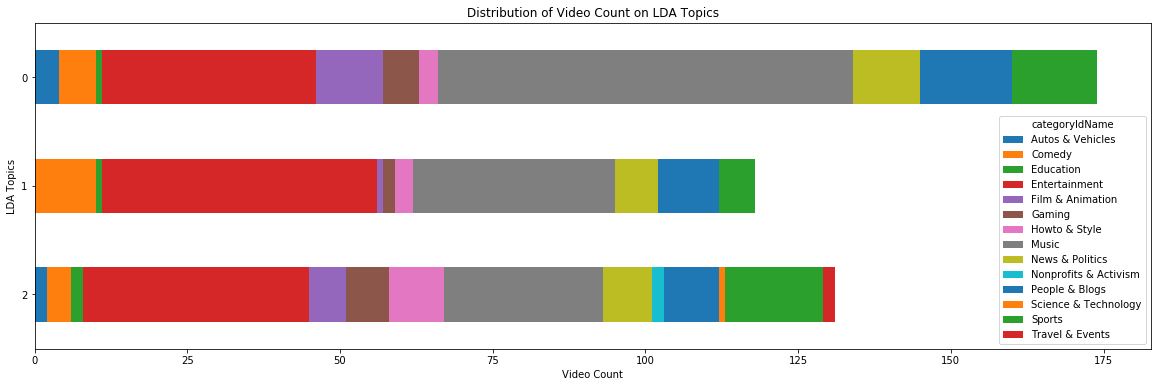

In [86]:
# plot the charts distribution
temp = no_dups_l.groupby(['lda_topic', 'categoryIdName']).agg('count')['video_id'].reset_index()
temp.sort_values('video_id', inplace = True, ascending = False)
def replace_empty(x):
    if x == '':
        return 'N/A'
    else:
        return x
    
temp['lda_topic'] = temp['lda_topic'].apply(lambda x: replace_empty(x))
temp['video_id'] = temp['video_id'].astype(int)
temp = temp.pivot(index='lda_topic', columns='categoryIdName', values='video_id')

temp.plot.barh(stacked=True, figsize=(20,6))
plt.gca().invert_yaxis()
plt.xlabel('Video Count')
plt.ylabel('LDA Topics')
plt.title('Distribution of Video Count on LDA Topics');

Looking at the clusters from the 3 topics generated by LDA, despite the mix of topics in among all the clusters, some of the general observation stated in the previous analysis seems to hold. For example, Topic 0 strong association with KPOP music video Red Velvet can be shown by the large proportion of Music videos. Topic 1 seems to be closely assoiated with another KPOP girl band Blackpink also shown by the large proportion of music. Topic 2 have close association with two primary topics English Premier League match highlights (Sports), Serie A match highlights (Sports), and SCTV Jendela SMP (Entertainment). Despite LDA's best efforts, the results might still not be satisfactory for topic modelling, and that these categories might still be too broad. One primary reason is due to the fact that video titles are fairly short compared to the usual documents used for LDA.

##### 5.2 STTM

**What is STTM?**
    - STTM is a variant of the LDA algorithm that assumes 1 topic equates one document (unlike LDA where one document can have several topics)
Learn more here: https://towardsdatascience.com/short-text-topic-modeling-70e50a57c883

In [87]:
from mgp import MovieGroupProcess
import operator

In [90]:
k = 5
mgp = MovieGroupProcess(K=k, alpha=0.1, beta=0.1, n_iters=100)
y = mgp.fit(data_words, len(vocab))

In stage 0: transferred 265 clusters with 5 clusters populated
In stage 1: transferred 137 clusters with 5 clusters populated
In stage 2: transferred 111 clusters with 5 clusters populated
In stage 3: transferred 86 clusters with 5 clusters populated
In stage 4: transferred 88 clusters with 5 clusters populated
In stage 5: transferred 73 clusters with 5 clusters populated
In stage 6: transferred 76 clusters with 5 clusters populated
In stage 7: transferred 72 clusters with 5 clusters populated
In stage 8: transferred 68 clusters with 5 clusters populated
In stage 9: transferred 84 clusters with 5 clusters populated
In stage 10: transferred 81 clusters with 5 clusters populated
In stage 11: transferred 81 clusters with 5 clusters populated
In stage 12: transferred 68 clusters with 5 clusters populated
In stage 13: transferred 79 clusters with 5 clusters populated
In stage 14: transferred 81 clusters with 5 clusters populated
In stage 15: transferred 78 clusters with 5 clusters populated

In [91]:
for i in range(k):
    print('Cluster ' + str(i))
    print(sorted(mgp.cluster_word_distribution[i].items(),key = operator.itemgetter(1),reverse = True)[:10])
    print('*' * 20)

Cluster 0
[('official', 41), ('video', 37), ('music', 21), ('mv', 15), ('cover', 14), ('like', 9), ('puja', 8), ('feat', 8), ('blackpink', 8), ('ft', 7)]
********************
Cluster 1
[('viral', 14), ('rumah', 8), ('diy', 6), ('lucu', 6), ('sekolah', 6), ('genius', 6), ('polisi', 6), ('123', 5), ('lelucon', 5), ('makanan', 5)]
********************
Cluster 2
[('blackpink', 17), ('like', 16), ('part', 13), ('cover', 9), ('dance', 7), ('episode', 7), ('billy', 7), ('2020', 6), ('gak', 6), ('amanda', 6)]
********************
Cluster 3
[('highlights', 10), ('ting', 10), ('2020', 9), ('serie', 9), ('match', 7), ('juventus', 7), ('tim', 7), ('1920', 6), ('part', 6), ('laliga', 5)]
********************
Cluster 4
[('highlights', 19), ('2020', 13), ('irene', 11), ('seulgi', 11), ('red', 10), ('velvet', 10), ('monster', 10), ('indonesia', 9), ('premier', 8), ('league', 8)]
********************


**Topics Analysis from STTM** <br/>
Let's take a brief look at the 5 topics generated by STTM. <br/>
    - Topic 0: official, video, music, mv, cover, like, puja, feat, blackpink, ft
        - This topic can be closely associated with official music video by KPOP girl band Blackpink
    - Topic 1: viral, rumah, diy, lucu, sekolah, genius, polisi, 123, lelucon, makanan
        - This topic can be closely associated with videos uploaded by 123 GO! GOLD Indonesian about life hacks
    - Topic 2: blackpink, like, part, cover, dance, episode, billy, 2020, gak, amanda
        - This topic can be closely associated with two topics cover of Blackpink's song by Indonesian singers and Indonesian celebrity gossip between billy and amanda
    - Topic 3: highlights, ting, 2020, serie, match, tim, 1920, part, laliga
        - This topic can be closely associated with soccer match highlights in Italy and Spain
    - Topic 4: highlights, 2020, irene, seulgi, red, velvet, monster, indonesia, premier, league
        - This topic can be closely associated with two topics English Premier League and KPOP girl band Red Velvet

In [92]:
# do prediction from STTM Model
topics = []
for i in range(len(data_words)):
    topics.append(mgp.choose_best_label(data_words[i])[0])
    
no_dups_l['sttm_topic'] = topics

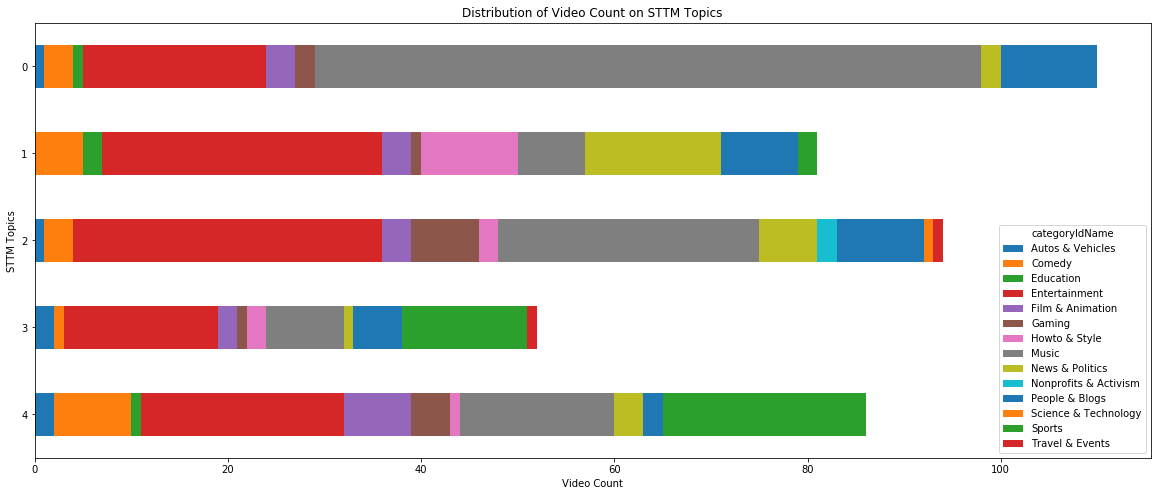

In [93]:
temp = no_dups_l.groupby(['sttm_topic', 'categoryIdName']).agg('count')['video_id'].reset_index()
temp.sort_values('video_id', inplace = True, ascending = False)
def replace_empty(x):
    if x == '':
        return 'N/A'
    else:
        return x
    
temp['sttm_topic'] = temp['sttm_topic'].apply(lambda x: replace_empty(x))
temp['video_id'] = temp['video_id'].astype(int)
temp = temp.pivot(index='sttm_topic', columns='categoryIdName', values='video_id')

temp.plot.barh(stacked=True, figsize=(20,8))
plt.gca().invert_yaxis()
plt.xlabel('Video Count')
plt.ylabel('STTM Topics')
plt.title('Distribution of Video Count on STTM Topics');

Looking at the clusters from the 5 topics generated by STTM, despite the mix of topics in among all the clusters, some of the general observation stated in the previous analysis seems to hold. For example, Topic 0 strong association with KPOP girlband music Blackpink (Music). Topic 1 has close association with life hacks videos by 123 Go Gold (Entertainment). Topic 2 seems to be closely assoiated with cover of Blackpink music covers by Indonesian singers (Music) and Indonesian celebrity gossip (Entertaintment) but all linked to Indonesia.  Topic 3 seems to be closely associated with Italian and Spain soccer match highlights (Sports). Finally, Topic 4 has a mixed focus between English Premier League match highlights (Sports), KPOP band Red Velvet (Music/Entertainment). Despite STTM's best efforts, the results might still not be satisfactory for topic modelling, and that these categories might still be too broad. One primary reason is due to the fact that video titles are fairly short compared to the usual documents used for LDA and STTM. 

#### 6. Thumbnail Analysis

**Here we will utilize the YOLOv3 Algorithm** <br/>
What is the YOLOv3 Algorithm? <br/>
YOLOv3 Algorithm is an object detection system that detects 80 different objects (trained on COCO dataset) on various images. 

Learn more here: https://pjreddie.com/darknet/yolo/

In [94]:
def download_images(thumbnail_link, idx):
    #print(thumbnail_link)
    try:
        urllib.request.urlretrieve(thumbnail_link, 'thumbnail_images/' + str(idx) + '.jpg')
    except:
        print('URL error: ', thumbnail_link)
    
# download images in parallel
Parallel(n_jobs=-1, require='sharedmem') \
(delayed(download_images)(elem, ind) for ind, elem in enumerate(no_dups_l['thumbnail_link'].values));

URL error:  https://i.ytimg.com/vi/zYaabxSbQhw/default.jpg
URL error:  https://i.ytimg.com/vi/tCOpOEKIlI8/default.jpg
URL error:  https://i.ytimg.com/vi/4dqS_fR2Bis/default.jpg


In [95]:
# load pretrained model from YOLOv3 website
net = cv2.dnn.readNetFromDarknet('darknet/cfg/yolov3.cfg', 'darknet/yolov3.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)   #GPU = cv2.dnn.DNN_TARGET_OPENCL_FP16, CPU = DNN_TARGET_CPU

In [96]:
inpWidth = 416  #608     # Width of network's input image
inpHeight = 416 #608     # Height of network's input image
confThreshold = 0.3  # Confidence threshold
nmsThreshold = 0.3  # Non-maximum suppression threshold

# List of COCO classes where YOLOv3 is trained on
classes = ['person','bicycle','car','motorbike','aeroplane','bus','train','truck','boat','traffic light','fire hydrant',
           'stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra',
           'giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite',
           'baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','wine glass','cup','fork',
           'knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut',
           'cake','chair','sofa','pottedplant','bed','diningtable','toilet','tvmonitor','laptop','mouse','remote',
           'keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','book','clock','vase','scissors',
           'teddy bear','hair drier','toothbrush' ]

In [97]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [98]:
# Draw the predicted bounding box
def drawPred(frame, classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 3)

    label = '%.2f' % conf

    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), 
                  (0, 0, 255), cv2.FILLED)
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)

In [99]:
# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outs, list_predictions):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    classIds = []
    confidences = []
    boxes = []
    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    if len(indices) >= 1:
        list_predictions.append(indices)
    else:
        list_predictions.append([])
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(frame, classIds[i], confidences[i], left, top, left + width, top + height)
    return list_predictions

In [100]:
def main_generate_prediction(input_path, output_path, list_predictions):
    # image file
    cap = cv2.imread(input_path)
    cap = cv2.resize(cap, (480,360))
    
    # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(cap, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)
    # Sets the input to the network
    net.setInput(blob)
    # Runs the forward pass to get output of the output layers
    outs = net.forward(getOutputsNames(net))
    # Remove the bounding boxes with low confidence
    list_predictions = postprocess(cap, outs, list_predictions)
    
    # Put efficiency information. The function getPerfProfile returns the overall time for inference(t) 
    # and the timings for each of the layers(in layersTimes)
    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    print(label)
    
    # Write the frame with the detection boxes
    cv2.imwrite(output_path, cap.astype(np.uint8));
    
    return list_predictions

In [101]:
# this might take a while to run the YOLOv3 Algorithm for prediction of all objects in the images
list_predictions = []

all_images = os.listdir('thumbnail_images')
for elem in all_images:
    print(elem)
    list_dictions = main_generate_prediction('thumbnail_images/' + elem,'thumbnail_images_out/' + elem, 
                                             list_predictions)

0.jpg
Inference time: 867.34 ms
1.jpg
Inference time: 926.77 ms
10.jpg
Inference time: 829.08 ms
100.jpg
Inference time: 859.06 ms
101.jpg
Inference time: 837.47 ms
102.jpg
Inference time: 837.96 ms
103.jpg
Inference time: 826.48 ms
104.jpg
Inference time: 849.52 ms
105.jpg
Inference time: 827.05 ms
106.jpg
Inference time: 867.13 ms
107.jpg
Inference time: 817.09 ms
108.jpg
Inference time: 819.97 ms
109.jpg
Inference time: 814.10 ms
11.jpg
Inference time: 814.16 ms
110.jpg
Inference time: 821.04 ms
111.jpg
Inference time: 890.88 ms
112.jpg
Inference time: 848.74 ms
113.jpg
Inference time: 1055.94 ms
114.jpg
Inference time: 999.73 ms
115.jpg
Inference time: 1170.39 ms
116.jpg
Inference time: 1115.07 ms
117.jpg
Inference time: 1100.03 ms
118.jpg
Inference time: 916.04 ms
119.jpg
Inference time: 947.60 ms
12.jpg
Inference time: 908.44 ms
120.jpg
Inference time: 916.45 ms
121.jpg
Inference time: 892.44 ms
122.jpg
Inference time: 916.29 ms
123.jpg
Inference time: 961.02 ms
124.jpg
Inference

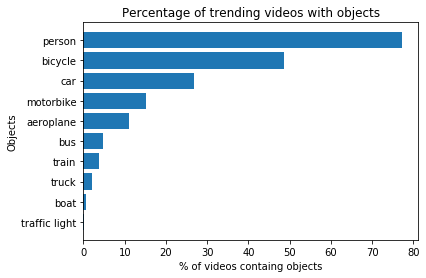

In [102]:
def unravel(x):
    if len(x) == 0:
        return x
    else:
        return x.ravel() 

def counter(x):
    all_uniq = set()
    # get all unique labels
    for elem in x:
        for elem2 in elem:
            all_uniq.add(elem2)
    
    counts = {}
    # initialize dict
    for elem in all_uniq:
        counts[elem] = 0
    
    # add counts
    for elem in x:
        for elem2 in elem:
            counts[elem2] += 1
    
    return counts

list_predictions = [unravel(elem) for elem in list_predictions]
hist_images = counter(list_predictions)
obj_labels = [classes[elem] for elem in hist_images.keys()]
perc = [elem * 100 / len(list_predictions) for elem in hist_images.values()]
plt.barh(obj_labels, perc)
plt.gca().invert_yaxis()
plt.xlabel('% of videos containg objects')
plt.ylabel('Objects')
plt.title('Percentage of trending videos with objects');

From the chart above, one can observe that ~80% of Youtube video thumbnails contains at least one person (potentiall more than one person). Transportation objects such as bicycle, cars, and motorbike are also quite prevalent in thumbnail images for trending videos.

### Conclusion
This analysis presented a comprehensive look at Indonesia 200 Trending videos from 8th Jul - 14th Jul 2020. In summary, we have observed trending videos, which are dominated by the Music and Entertainment category, might remain trending for more than 1 week. Moreover, some channels might have multiple trending videos at the same time. Generally, the first 48 hours after the video gets published is a crucial factor in determining the video's trending abilities. In terms of the general statistics (eg views, comments, like, dislikes), videos that cater to a wide variety of global citizens top these categories. However, specifically for comment volumnes, Indonesian videos tend to perform better than other videos in the trending list due to the famed Indonesian "Netizens". In terms of the channels whose videos are published to the trending list, they primarily originate from Indonesia (due to locality), and South Korea (due to KPOP boom). These channels may have vastly different subscriber counts ranging from small (<500k) to large (>10M) and varying social blade rankings (A,B,C). Therefore, the impact on being on the trending list for channel video views might vary depending on the content of the video and the reach of the audiences with an average of 78% in channel video views compared to 3-day averae before the video is published. However, some channels might experience an up to 1000% increase in channel video views or a -80% decrease compared to 3-day average before the viral video is published. <br/>

In terms of text analysis for the title lengths, 9 worded title seemed to be the most common for Youtube Videos which is not too long and not too short. Title text analysis shows that BLACKPINK, MUSIC VIDEO, HIGHLIGHTS, OFFICIAL tend to dominate, while for the description text analysis, words like INSTAGRAM, SUBSCRIBE, YOUTUBE CHANNEL tend to dominate to encourage viewers to consistently get updates for the Youtube channel. For the tags, words like INDONESIA, and HOW YOU, LIKE THAT dominates due to the both the locality of the region and the viralness of Blackpink "How you like that" music video which has been viewed more than 250M times. <br/>

In terms of topic modelling, both LDA and STTM generated appropriate general topics within each of their clusters but due to the brevity of Youtube video title, the topics generated might be too general for our liking. For the thumbnail image analysis done using YOLOv3, ~80% of trending videos have at least one occurance of a person. <br/>

I hope you enjoy reading this analysis! We are DONE!

<br/>

**Improvements for the future**<br/>
    - Collecting more daily trending data to eliminate various assumptions throughout this analysis